<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/CGR_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Options

In [34]:
options(scipen=999)

options(repr.plot.width=14, repr.plot.height=15)

options(warn=-1)

# Packages

In [205]:
library(tidyverse)
library(ggplot2)
library(lubridate)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("Jmisc")
library(Jmisc)
install.packages("gmodels")
library(gmodels)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Data


In [160]:
# add csv file 
CGR_gender_compiled <- read.csv("/content/CGR_2_Gender - CGR_2Gender_Compiled.csv")
head(CGR_gender_compiled,3)
tail(CGR_gender_compiled,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0
2,2016,Cayuga,Felony Total,431,326,105,0
3,2016,Cayuga,Drug,51,36,15,0


,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
306,2019,Yates,DWI,58,42,16,0
307,2019,Yates,Property,26,19,7,0
308,2019,Yates,Other,92,70,22,0


In [190]:
gender_pct <- read.csv("/content/CGR_2_Gender - Compiled_3.csv")
head(gender_pct,3)
tail(gender_pct,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeMaleCorrected,PctChangeFemale,PctChangeFemaleCorrected,TotalChange,ChangeMale,ChangeMalePct,ChangeFemale
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<lgl>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0,2019,Cayuga,Total Arrests,⋯,0.9032023,-0.09679767,0.9339525284,-0.06604747162,0.8296296,-0.17037037,-133,-64,NA,-69
2,2016,Cayuga,Felony Total,431,326,105,0,2019,Cayuga,Felony Total,⋯,0.9535963,-0.04640371,0.9478527607,-0.05214723926,0.9714286,-0.02857143,-20,-17,NA,-3
3,2016,Cayuga,Drug,51,36,15,0,2019,Cayuga,Drug,⋯,1.2941176,0.29411765,1.194444444,0.1944444444,1.5333333,0.53333333,15,7,NA,8


,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeMaleCorrected,PctChangeFemale,PctChangeFemaleCorrected,TotalChange,ChangeMale,ChangeMalePct,ChangeFemale
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<lgl>,<int>
152,2016,Yates,DWI,56,38,18,0,2019,Yates,DWI,⋯,1.0357143,0.03571429,1.105263158,0.1052631579,0.8888889,-0.1111111,2,4,NA,-2
153,2016,Yates,Property,52,27,25,0,2019,Yates,Property,⋯,0.5000000,-0.50000000,0.7037037037,-0.2962962963,0.2800000,-0.7200000,-26,-8,NA,-18
154,2016,Yates,Other,107,77,30,0,2019,Yates,Other,⋯,0.8598131,-0.14018692,0.9090909091,-0.09090909091,0.7333333,-0.2666667,-15,-7,NA,-8


In [191]:
CGR_race <- read.csv("/content/CGR_race_ethnicity_worksheet - ValuesOnly.csv")
head(CGR_race,3)
tail(CGR_race,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,0,0.000000000,1,0.019607843


,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
305,Yates,2019,DWI,58,52,0.8965517,2,0.03448276,3,0.05172414,0,0,1,0.01724138
306,Yates,2019,Property,26,23,0.8846154,3,0.11538462,0,0.00000000,0,0,0,0.00000000
307,Yates,2019,Other,92,86,0.9347826,3,0.03260870,3,0.03260870,0,0,0,0.00000000


In [40]:
Race_values <- read.csv("/content/CGR_race_ethnicity_worksheet - ValuesOnly.csv")
head(Race_values,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,0,0.000000000,1,0.019607843


In [41]:
Race_values_Pct_Change <- read.csv("/content/CGR_race_ethnicity_worksheet - ValuesOnly_2 - wide.csv")
head(Race_values_Pct_Change,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,⋯,BlackPctDiff,Hispanic_19,HispanicPct_19,HispanicPctDiff,Asian_19,AsianPct_19,AsianPctDiff,Other.Unknown_19,OtherPct_19,OthrPctDiff
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,⋯,0.1717566479,56,0.04512490,0.4762288475,1,0.0008058018,-0.4464141822,5,0.004029009,-0.7086390432
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,⋯,0.2766317568,25,0.06082725,1.184712084,0,0.0000000000,#DIV/0!,3,0.007299270,0.5729927006
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,⋯,0.1107954546,5,0.07575758,2.863636363,0,0.0000000000,#DIV/0!,1,0.015151515,-0.2272727275


# Pre-Processing

In [42]:
CGR_gender_compiled$Year <- as.factor(CGR_gender_compiled$Year)

# make year a 
Race_values$year <- as.factor(Race_values$year)

# First Question

### *Display the data for the Total Arrests*

In [ ]:
# Total arrests for both 2016 & 2019
Sum <- colSums(CGR_gender_compiled[ , 4, drop= FALSE])
Sum

Total.Arrests 
       230970

# Second Question

### *Display the data for Total Arrests by Gender*

In [ ]:
# Total arrests for Males
colSums(CGR_gender_compiled[ , 5, drop= FALSE])

Male 
164391

In [ ]:
# Total arrests for Females
colSums(CGR_gender_compiled[ , 6, drop= FALSE])

Female 
 66549

# Third Question

### *Display the data for Total Arrest by Race/Ethnicity*

In [ ]:
#df <- data.frame(colname = names(demo),colSums_demo=colSums(demo))
df <- data.frame(colSums(CGR_race[ , c(5,7,9,11,13)]))
df

,colSums.CGR_race...c.5..7..9..11..13...
,<dbl>
White,130744
Black,78014
Hispanic,18007
Asian,1734
Other.Unknown,2232


# Fourth Question

## *Calculate change over time for each of the above*

## **Calculate change over time for Total Arrests**

124185 (2016) - 106785 (2019) = 17400

17400 / 124185 = 0.140113540282643

The rate of decline/decay is appx 14% over the 4 year period.

124185 * 0.86 = 106799





## **Calculate the change over time for Total Arrests by Gender**



**Male**

Male: 75768 (2019) - Male: 88623 (2016) = -12855

-12855/88623 = -0.145052638705528

**There was an appx drop of 15% in Total Arrest for males between 2016 and 2019.**

In [ ]:
75768-88623
-12855/88623 


[1] -12855

[1] -0.1450526

**Female**

In [10]:
Total_Arrests_16 <- CGR_gender_compiled %>%
                filter(Year == "2016") 
head(Total_Arrests_16 ,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0
2,2016,Cayuga,Felony Total,431,326,105,0
3,2016,Cayuga,Drug,51,36,15,0


In [11]:
Total_Arrests_19 <- CGR_gender_compiled %>%
                filter(Year == "2019")
head(Total_Arrests_19,3) 

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2019,Cayuga,Total Arrests,1241,905,336,0
2,2019,Cayuga,Felony Total,411,309,102,0
3,2019,Cayuga,Drug,66,43,23,0


In [12]:
# Total arrests for Males
colSums(Total_Arrests_16[ , 6, drop= FALSE])


Female 
 35550

In [13]:
# Total arrests for Males
colSums(Total_Arrests_19[ , 6, drop= FALSE])

Female 
 30999

Female: 30999 (2019) - Female: 35550 (2016) = -4551

-4551 / 35550 = -0.128016877637131

**There was a 12.8% drop in Total Arrests of women**

In [14]:
30999 - 35550
-4551 / 35550 


[1] -4551

[1] -0.1280169

**Calculate the change over time by Race/Ethnicity**

In [ ]:
head(CGR_race,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,0,0.000000000,1,0.019607843


In [15]:
Race_values_long <- pivot_longer(Race_values , cols = 4:14, names_to = "Race", values_to = "Number")

In [16]:
head(Race_values_long)

county,year,crime,Race,Number
<chr>,<fct>,<chr>,<chr>,<dbl>
Cayuga,2016,Total Arrests,Total.Arrests,1374.0000000
Cayuga,2016,Total Arrests,White,1071.0000000
Cayuga,2016,Total Arrests,WhitePct,0.7794760
Cayuga,2016,Total Arrests,Black,240.0000000
Cayuga,2016,Total Arrests,BlackPct,0.1746725
Cayuga,2016,Total Arrests,Hispanic,42.0000000


In [17]:
# filter out Total Crime
Total_Crime_Race <- Race_values_long %>%
                  filter(crime == "Total Arrests")

In [ ]:
#extract out the counts (as opposed to the pcts)
target <- c("Asian", "Black","Hispanic","White","Other.Unknown")

In [ ]:
Total_Crime_Race <- filter(Total_Crime_Race, Race %in% target)

In [ ]:
# divide data by year
Total_Crime_Race_16 <- Total_Crime_Race %>%
                filter(year == "2016")

In [ ]:
# divide data by year
Total_Crime_Race_19 <- Total_Crime_Race %>%
                filter(year == "2019")

**Make a seperate df for 2016 & 2019**

In [ ]:
#https://stackoverflow.com/questions/1660124/how-to-sum-a-variable-by-group
Race_totals_2016 <- Total_Crime_Race_16 %>%
    group_by(Race) %>%
    summarise(sum = sum(Number))
Race_totals_2016 

Race,sum
<chr>,<dbl>
Asian,300
Black,13555
Hispanic,3071
Other.Unknown,382
White,24087


In [ ]:
Race_totals_2019 <- Total_Crime_Race_19 %>%
    group_by(Race) %>%
    summarise(sum = sum(Number))
Race_totals_2019 

Race,sum
<chr>,<dbl>
Asian,278
Black,12456
Hispanic,2937
Other.Unknown,363
White,19561


In [ ]:
# revise 2019 column name
Race_totals_2019 <-rename(Race_totals_2019 , sum_2019 = sum)
Race_totals_2019 

Race,sum_2019
<chr>,<dbl>
Asian,278
Black,12456
Hispanic,2937
Other.Unknown,363
White,19561


**Now combine those df using col bind and subtract 2016 from 2019 and divide 2019 by 2016.**

In [ ]:
new_data <- cbind(Race_totals_2016 , Race_totals_2019 )
new_data

Race,sum,Race,sum_2019
<chr>,<dbl>,<chr>,<dbl>
Asian,300,Asian,278
Black,13555,Black,12456
Hispanic,3071,Hispanic,2937
Other.Unknown,382,Other.Unknown,363
White,24087,White,19561


In [ ]:
new_data$difference <- new_data$sum_2019 - new_data$sum
new_data

Race,sum,Race,sum_2019,difference
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Asian,300,Asian,278,-22
Black,13555,Black,12456,-1099
Hispanic,3071,Hispanic,2937,-134
Other.Unknown,382,Other.Unknown,363,-19
White,24087,White,19561,-4526


In [ ]:
new_data$divison <- new_data$sum_2019 / new_data$sum
new_data

Race,sum,Race,sum_2019,difference,divison
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Asian,300,Asian,278,-22,0.9266667
Black,13555,Black,12456,-1099,0.9189229
Hispanic,3071,Hispanic,2937,-134,0.9563660
Other.Unknown,382,Other.Unknown,363,-19,0.9502618
White,24087,White,19561,-4526,0.8120978


In [ ]:
new_data <- addCol(new_data, one=1)
new_data

Race,sum,Race,sum_2019,difference,divison,one
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<list>
Asian,300,Asian,278,-22,0.9266667,1
Black,13555,Black,12456,-1099,0.9189229,1
Hispanic,3071,Hispanic,2937,-134,0.9563660,1
Other.Unknown,382,Other.Unknown,363,-19,0.9502618,1
White,24087,White,19561,-4526,0.8120978,1


In [ ]:
new_data$one <- as.numeric(new_data$one)

**To get the Pct difference we subtract pct_diff from 1**

In [ ]:
new_data$pct_change <- ((new_data$one - new_data$divison)*-1)

new_data

Race,sum,Race,sum_2019,difference,divison,one,pct_difference,pct_change
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asian,300,Asian,278,-22,0.9266667,1,-0.07333333,-0.07333333
Black,13555,Black,12456,-1099,0.9189229,1,-0.08107709,-0.08107709
Hispanic,3071,Hispanic,2937,-134,0.9563660,1,-0.04363400,-0.04363400
Other.Unknown,382,Other.Unknown,363,-19,0.9502618,1,-0.04973822,-0.04973822
White,24087,White,19561,-4526,0.8120978,1,-0.18790219,-0.18790219


**The change overtime vis e vis Race/Ethnicity is in the "pct_change" column.**

#  Fifth Question

### **Create Visualizations**




## Chart 1: Total Arests

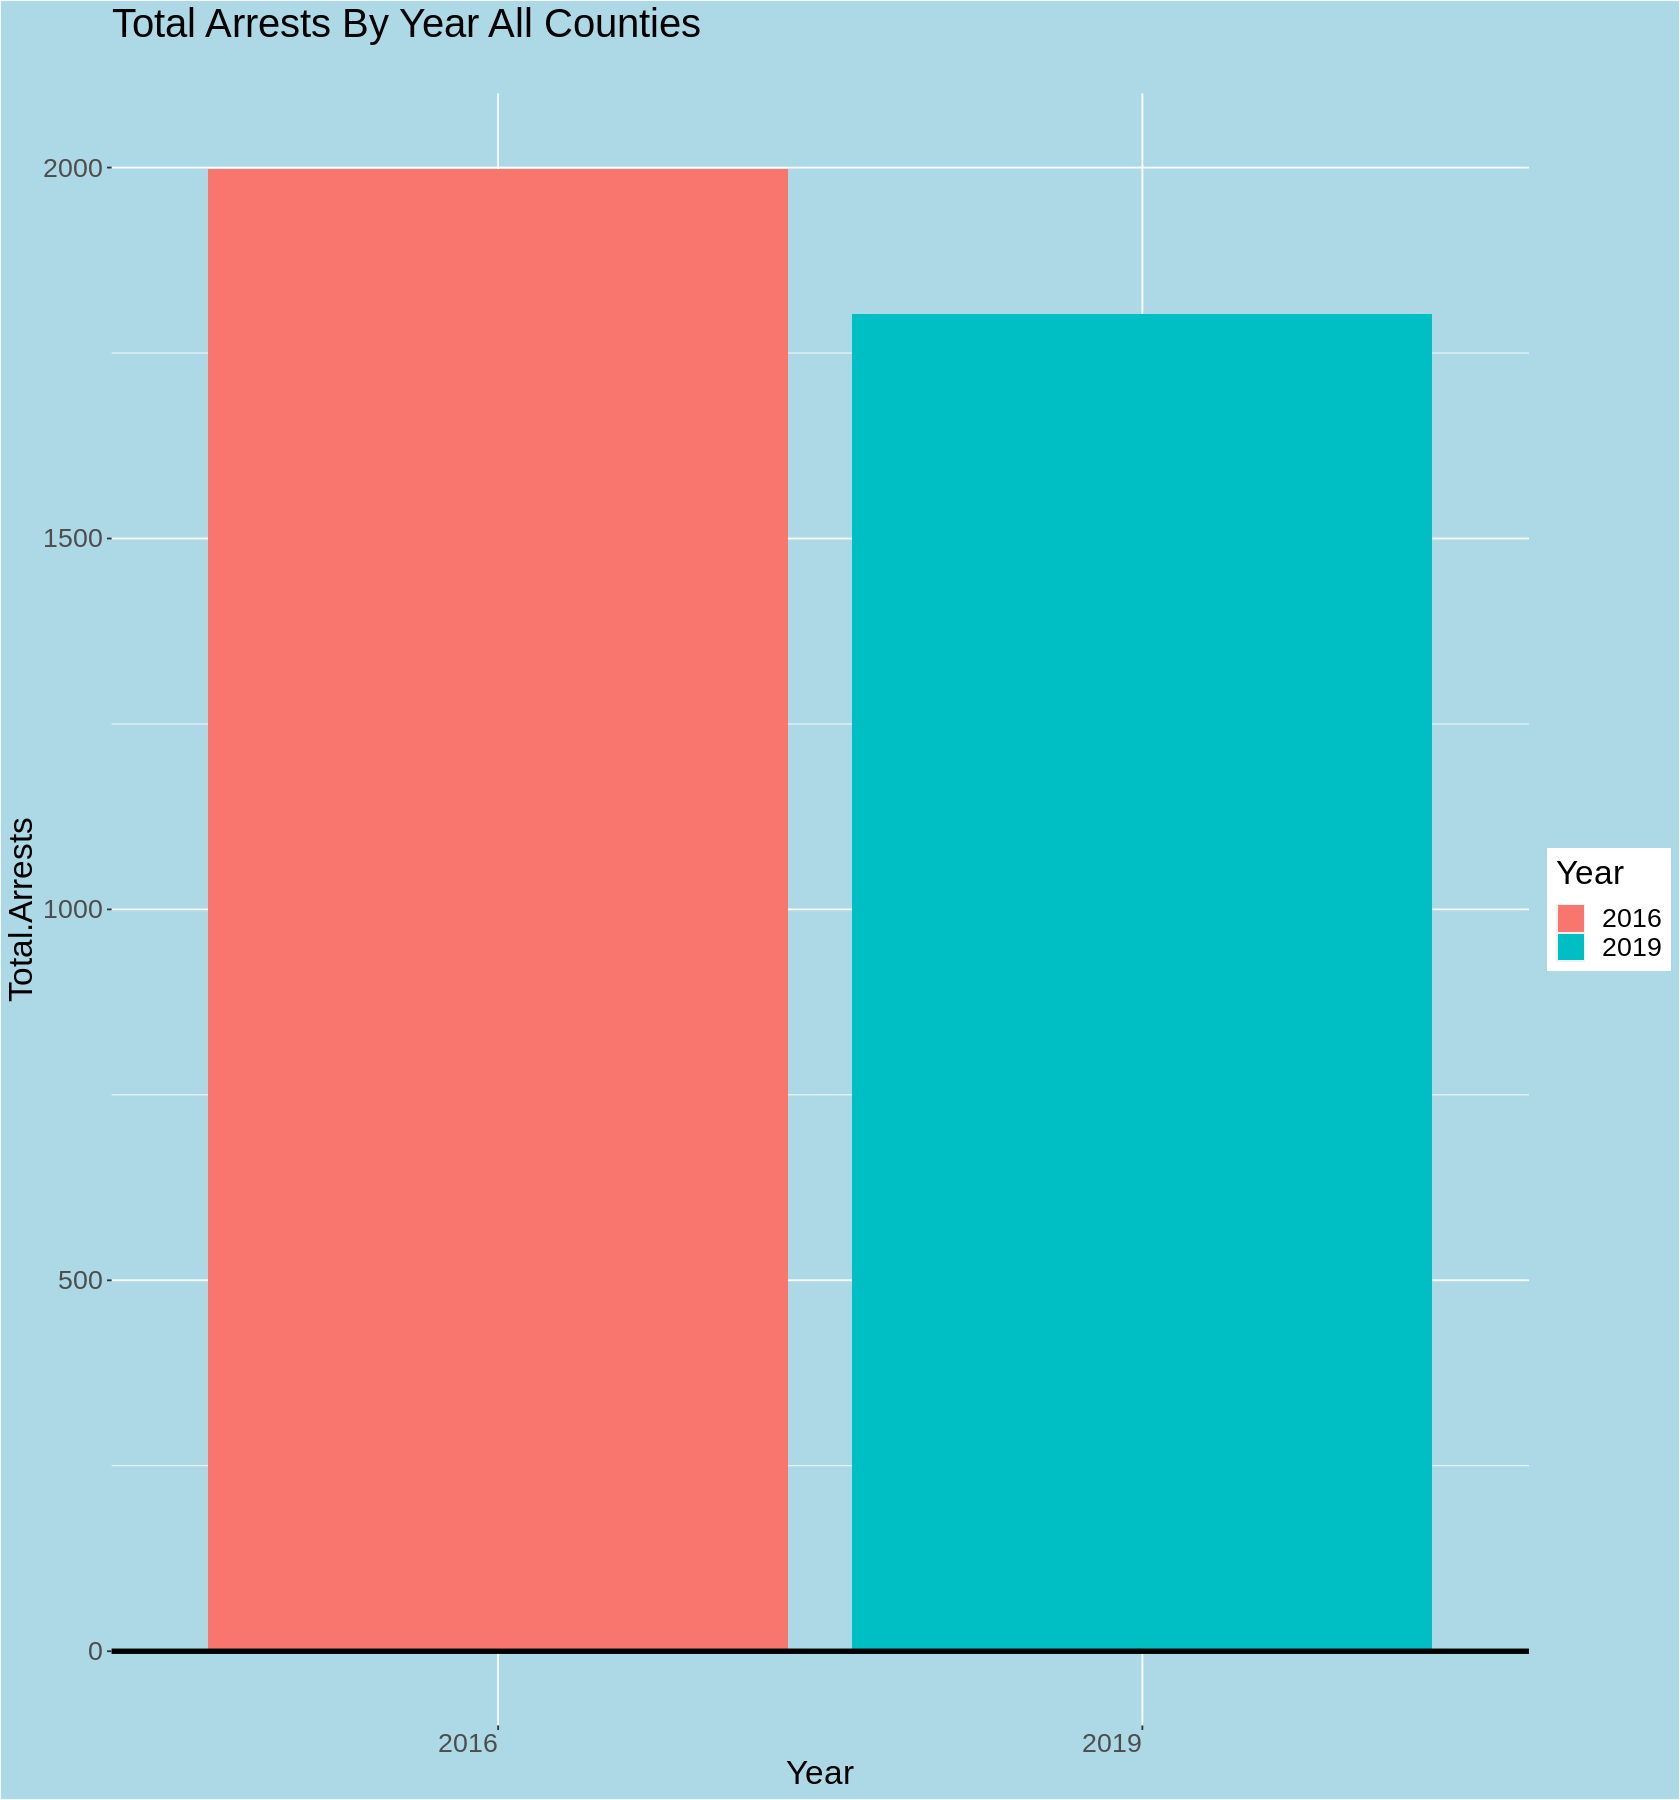

In [ ]:
ggplot(CGR_gender_compiled, aes(x= Year , y = Total.Arrests , fill = Year)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,2000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Total Arrests By Year All Counties",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue"))

## Chart 2: Total Arrests By Gender

In [96]:
CGR_gender_compiled_longer <- pivot_longer(CGR_gender_compiled, cols = 4:7,names_to= "Gender", values_to = "Arrested")

In [106]:
head(CGR_gender_compiled_longer,10)

Year,County,Crime,Gender,Arrested
<fct>,<chr>,<chr>,<chr>,<int>
2016,Cayuga,Total Arrests,Male,969
2016,Cayuga,Total Arrests,Female,405
2016,Chemung,Total Arrests,Male,1360
2016,Chemung,Total Arrests,Female,755
2016,Cortland,Total Arrests,Male,967
2016,Cortland,Total Arrests,Female,382
2016,Livingston,Total Arrests,Male,949
2016,Livingston,Total Arrests,Female,402
2016,Monroe,Total Arrests,Male,10880


In [107]:
#Next filter out for only Male & Female
CGR_gender_compiled_longer <- CGR_gender_compiled_longer %>%
                    filter(Gender == "Male"| Gender == "Female")

In [108]:
#Next filter out for only Male & Female
CGR_gender_compiled_longer <- CGR_gender_compiled_longer %>%
                    filter(Crime == "Total Arrests")

In [111]:
head(CGR_gender_compiled_longer,3)
tail(CGR_gender_compiled_longer,3)

Year,County,Crime,Gender,Arrested
<fct>,<chr>,<chr>,<chr>,<int>
2016,Cayuga,Total Arrests,Male,969
2016,Cayuga,Total Arrests,Female,405
2016,Chemung,Total Arrests,Male,1360


Year,County,Crime,Gender,Arrested
<fct>,<chr>,<chr>,<chr>,<int>
2019,Wayne,Total Arrests,Female,327
2019,Yates,Total Arrests,Male,205
2019,Yates,Total Arrests,Female,65


In [112]:
head(CGR_gender_compiled,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0
2,2016,Cayuga,Felony Total,431,326,105,0
3,2016,Cayuga,Drug,51,36,15,0


In [116]:
colSums(CGR_gender_compiled[ , c(4,5,6 )] , na.rm=TRUE)

Total.Arrests          Male        Female 
       230970        164391         66549

In [117]:
gender <- c("Male","Female")
Total_Arrests <- c(164391 ,66549 )


In [123]:
df<- data.frame(gender , Total_Arrests)
str(df)

'data.frame':	2 obs. of  2 variables:
 $ gender       : chr  "Male" "Female"
 $ Total_Arrests: num  164391 66549


In [125]:
df$gender <- as.factor(df$gender)

In [126]:
str(df)

'data.frame':	2 obs. of  2 variables:
 $ gender       : Factor w/ 2 levels "Female","Male": 2 1
 $ Total_Arrests: num  164391 66549


In [131]:
df

gender,Total_Arrests
<fct>,<dbl>
Male,164391
Female,66549


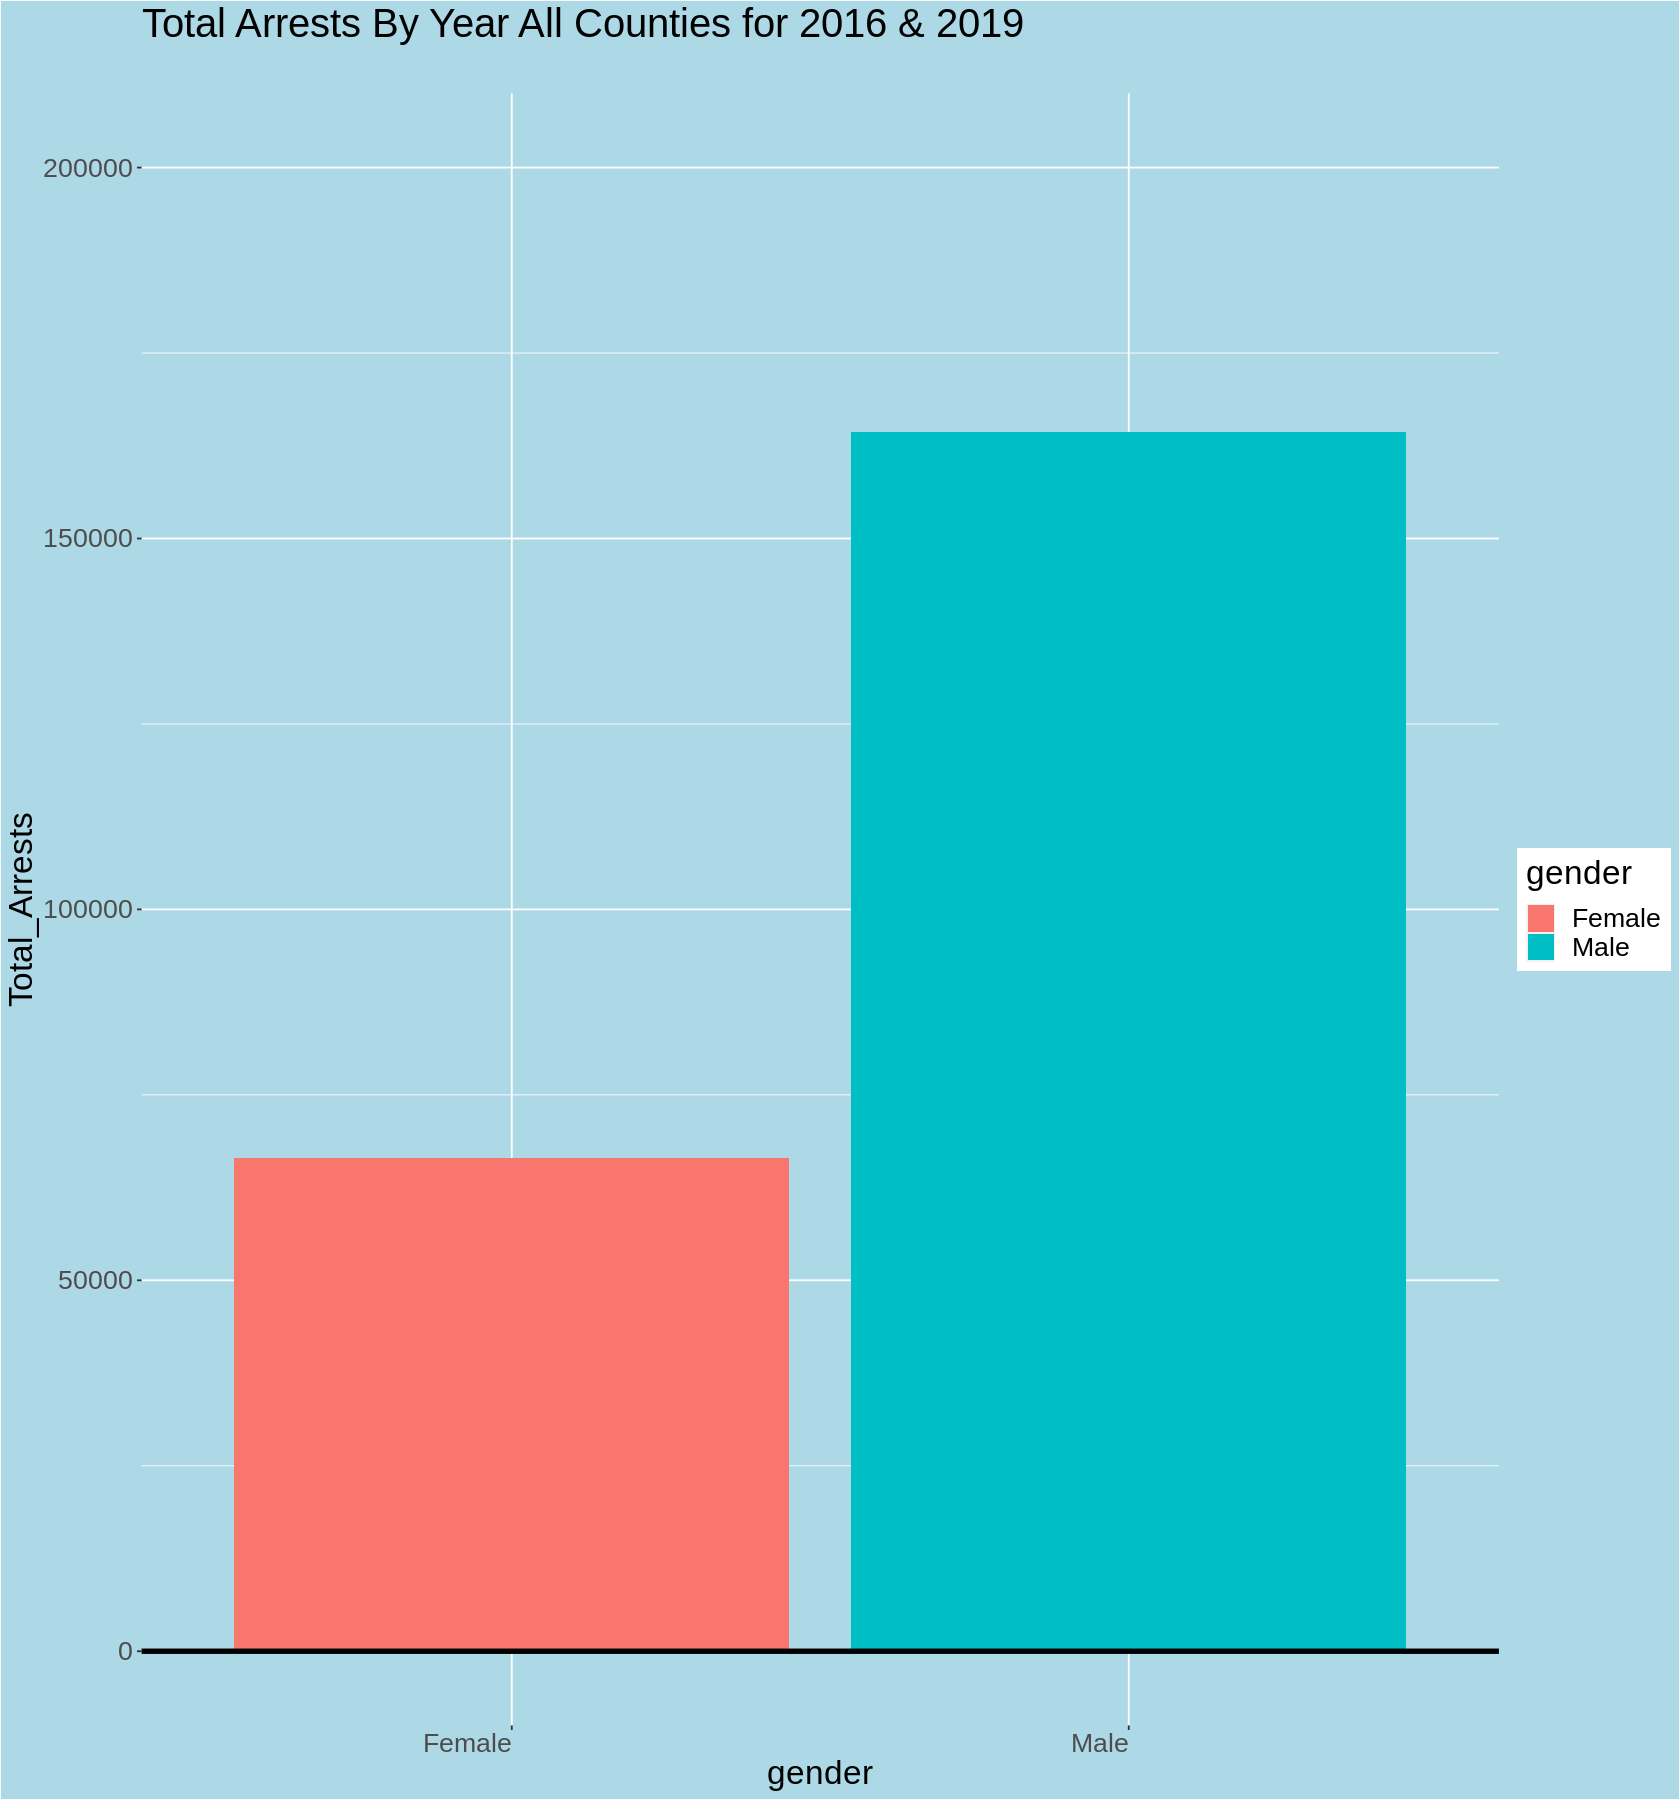

In [136]:
ggplot(df, aes(x= gender , y = Total_Arrests , fill = gender)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 , 200000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Total Arrests By Year All Counties for 2016 & 2019",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue"))

## Chart 3: Total Arrests for Ethnicity

In [ ]:
head(CGR_race)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.030567686,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.027842227,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.019607843,0,0.000000000,1,0.019607843
4,Cayuga,2016,Violent,104,79,0.7596154,24,0.2307692,1,0.009615385,0,0.000000000,0,0.000000000
5,Cayuga,2016,DWI,38,33,0.8684211,4,0.1052632,0,0.000000000,0,0.000000000,1,0.026315789
6,Cayuga,2016,Other,238,180,0.7563025,48,0.2016807,10,0.042016807,0,0.000000000,0,0.000000000


Sum each race col

In [ ]:
#df <- data.frame(colname = names(demo),colSums_demo=colSums(demo))
df <- data.frame(colSums(CGR_race[ , c(5,7,9,11,13)]))
df

,colSums.CGR_race...c.5..7..9..11..13...
,<dbl>
White,130744
Black,78014
Hispanic,18007
Asian,1734
Other.Unknown,2232


In [ ]:
str(df)

'data.frame':	5 obs. of  1 variable:
 $ colSums.CGR_race...c.5..7..9..11..13...: num  130744 78014 18007 1734 2232


Ah, an "unexpected result": a DF missing a col name

In [ ]:
Totals_race <- setNames(cbind(rownames(df) , df , row.names= NULL) ,
      c("Race_Ethnicity", "Total"))

In [ ]:
Totals_race

Race_Ethnicity,Total
<chr>,<dbl>
White,130744
Black,78014
Hispanic,18007
Asian,1734
Other.Unknown,2232


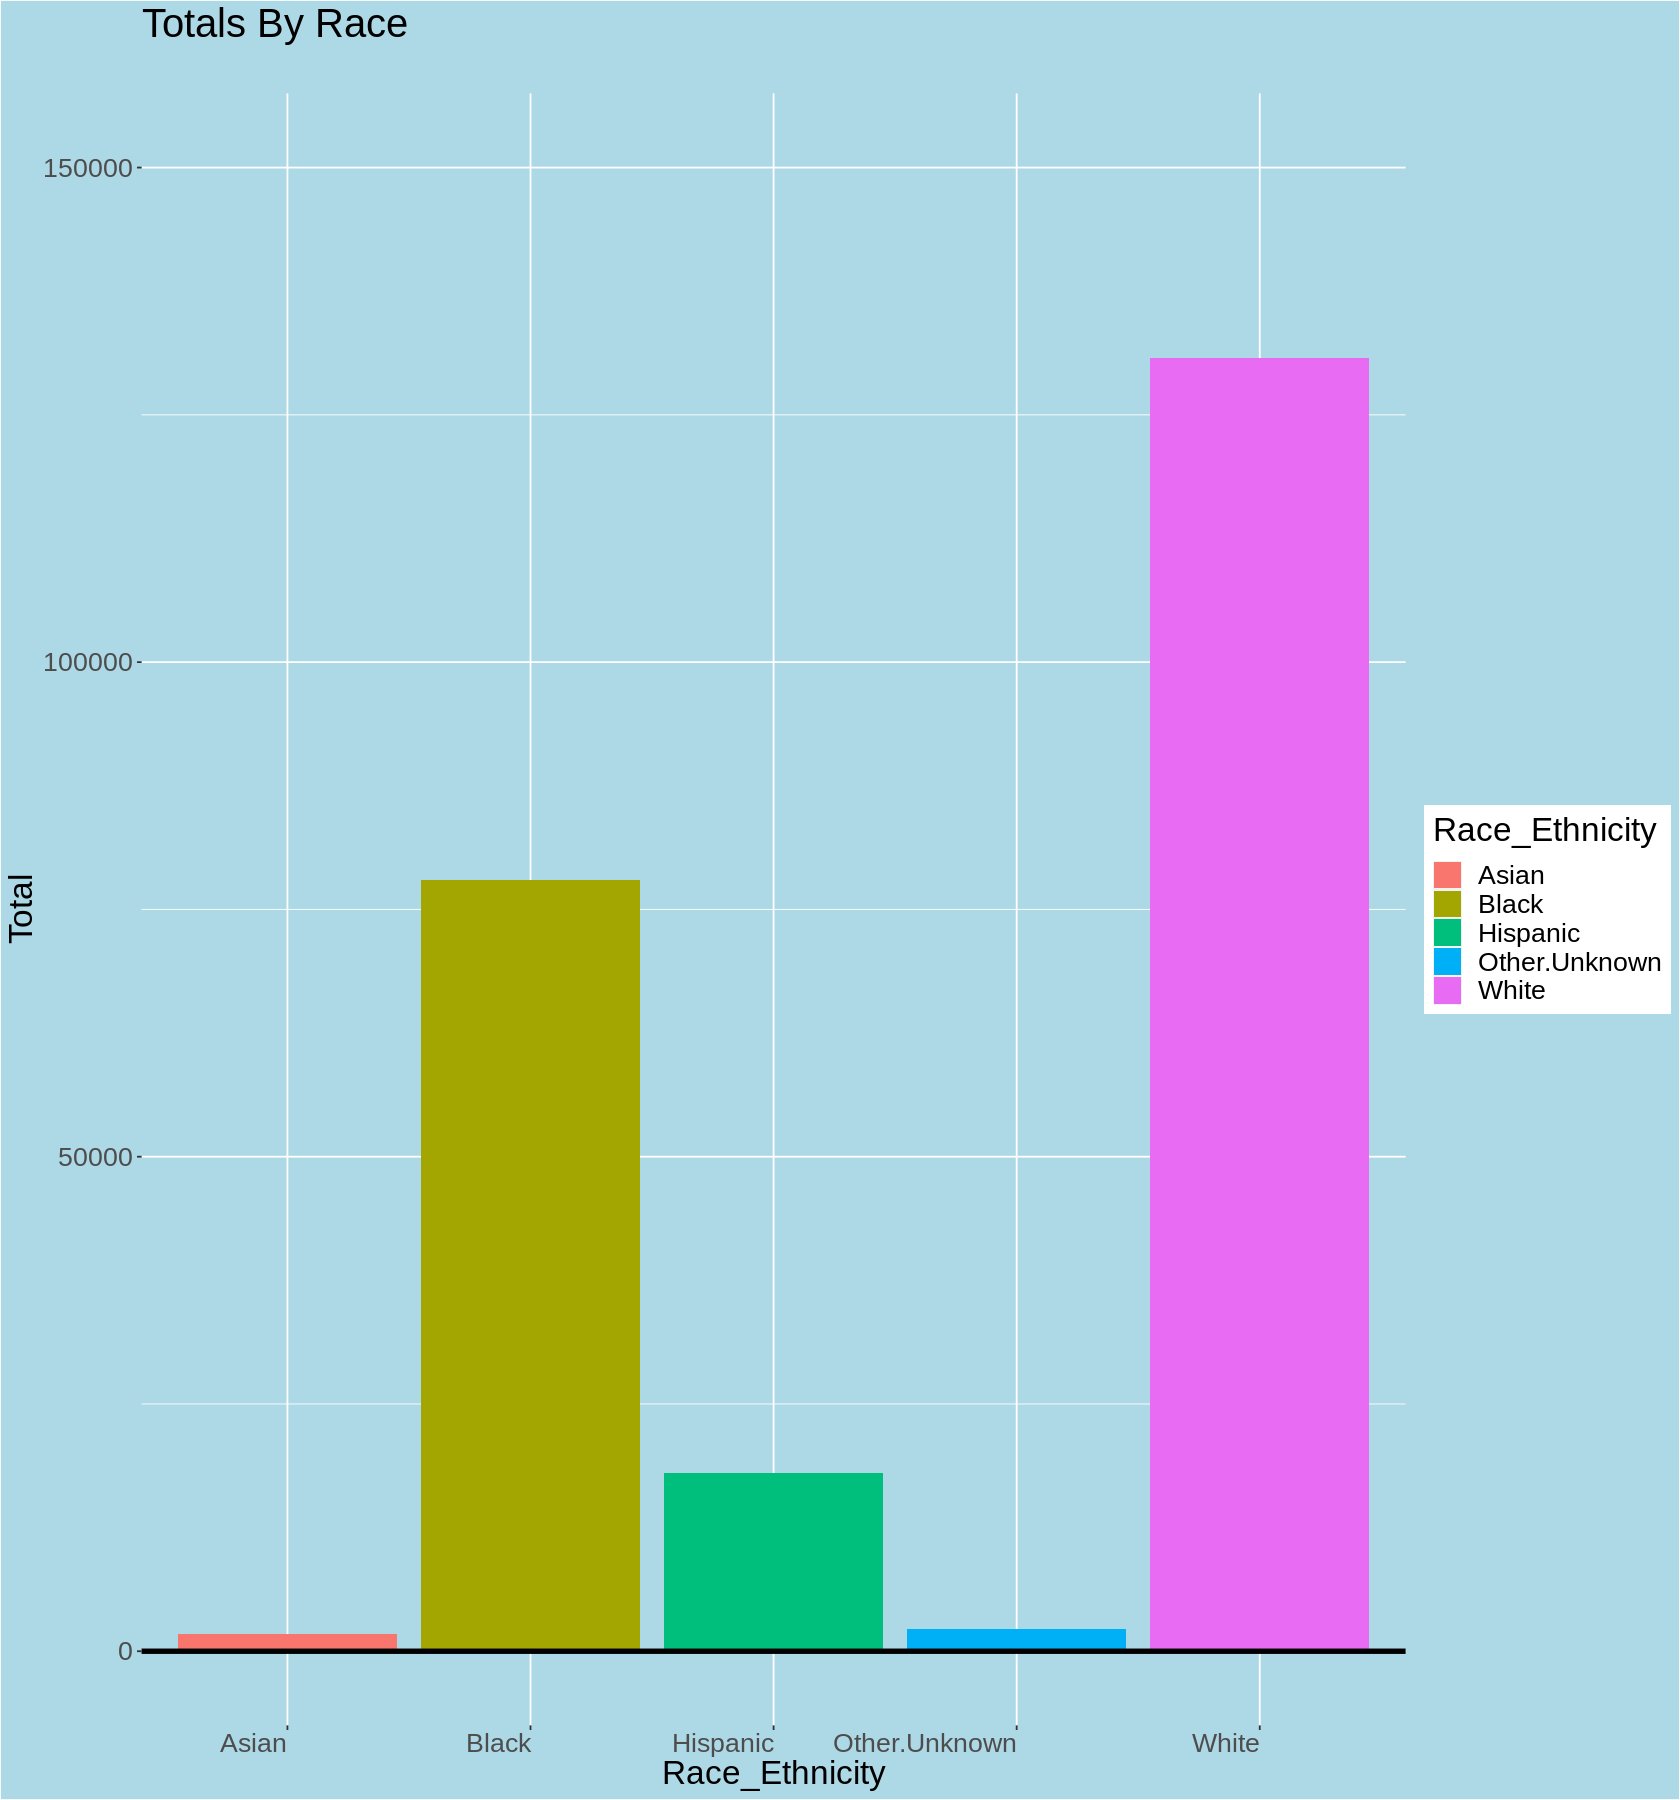

In [ ]:
ggplot(Totals_race, aes(x= Race_Ethnicity , y = Total , fill = Race_Ethnicity)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,150000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Totals By Race",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                      guides(colour = guide_legend(reverse=T))+
                      guides(colour = guide_legend(reverse=TRUE))

## Chart 4: Change In Time for For All Arrests by County

In [ ]:
head(Race_values_long,3)
tail(Race_values_long,3)

county,year,crime,Race,Number
<chr>,<fct>,<chr>,<chr>,<dbl>
Cayuga,2016,Total Arrests,Total.Arrests,1374.000000
Cayuga,2016,Total Arrests,White,1071.000000
Cayuga,2016,Total Arrests,WhitePct,0.779476


county,year,crime,Race,Number
<chr>,<fct>,<chr>,<chr>,<dbl>
Yates,2019,Other,AsianPct,0
Yates,2019,Other,Other.Unknown,0
Yates,2019,Other,OtherPct,0


In [ ]:
County_Total_Arrest  <- Race_values_long %>%
                filter(crime == "Total Arrests" & Race == "Total.Arrests" )

In [ ]:
County_Total_Arrest$county <- as.factor(County_Total_Arrest$county)


In [ ]:
County_Total_Arrest_select <- County_Total_Arrest %>%
        select(county, year, Number)
head(County_Total_Arrest_select,3)

county,year,Number
<fct>,<fct>,<dbl>
Cayuga,2016,1374
Chemung,2016,2115
Cortland,2016,1349


In [ ]:
County_Total_Arrest_select

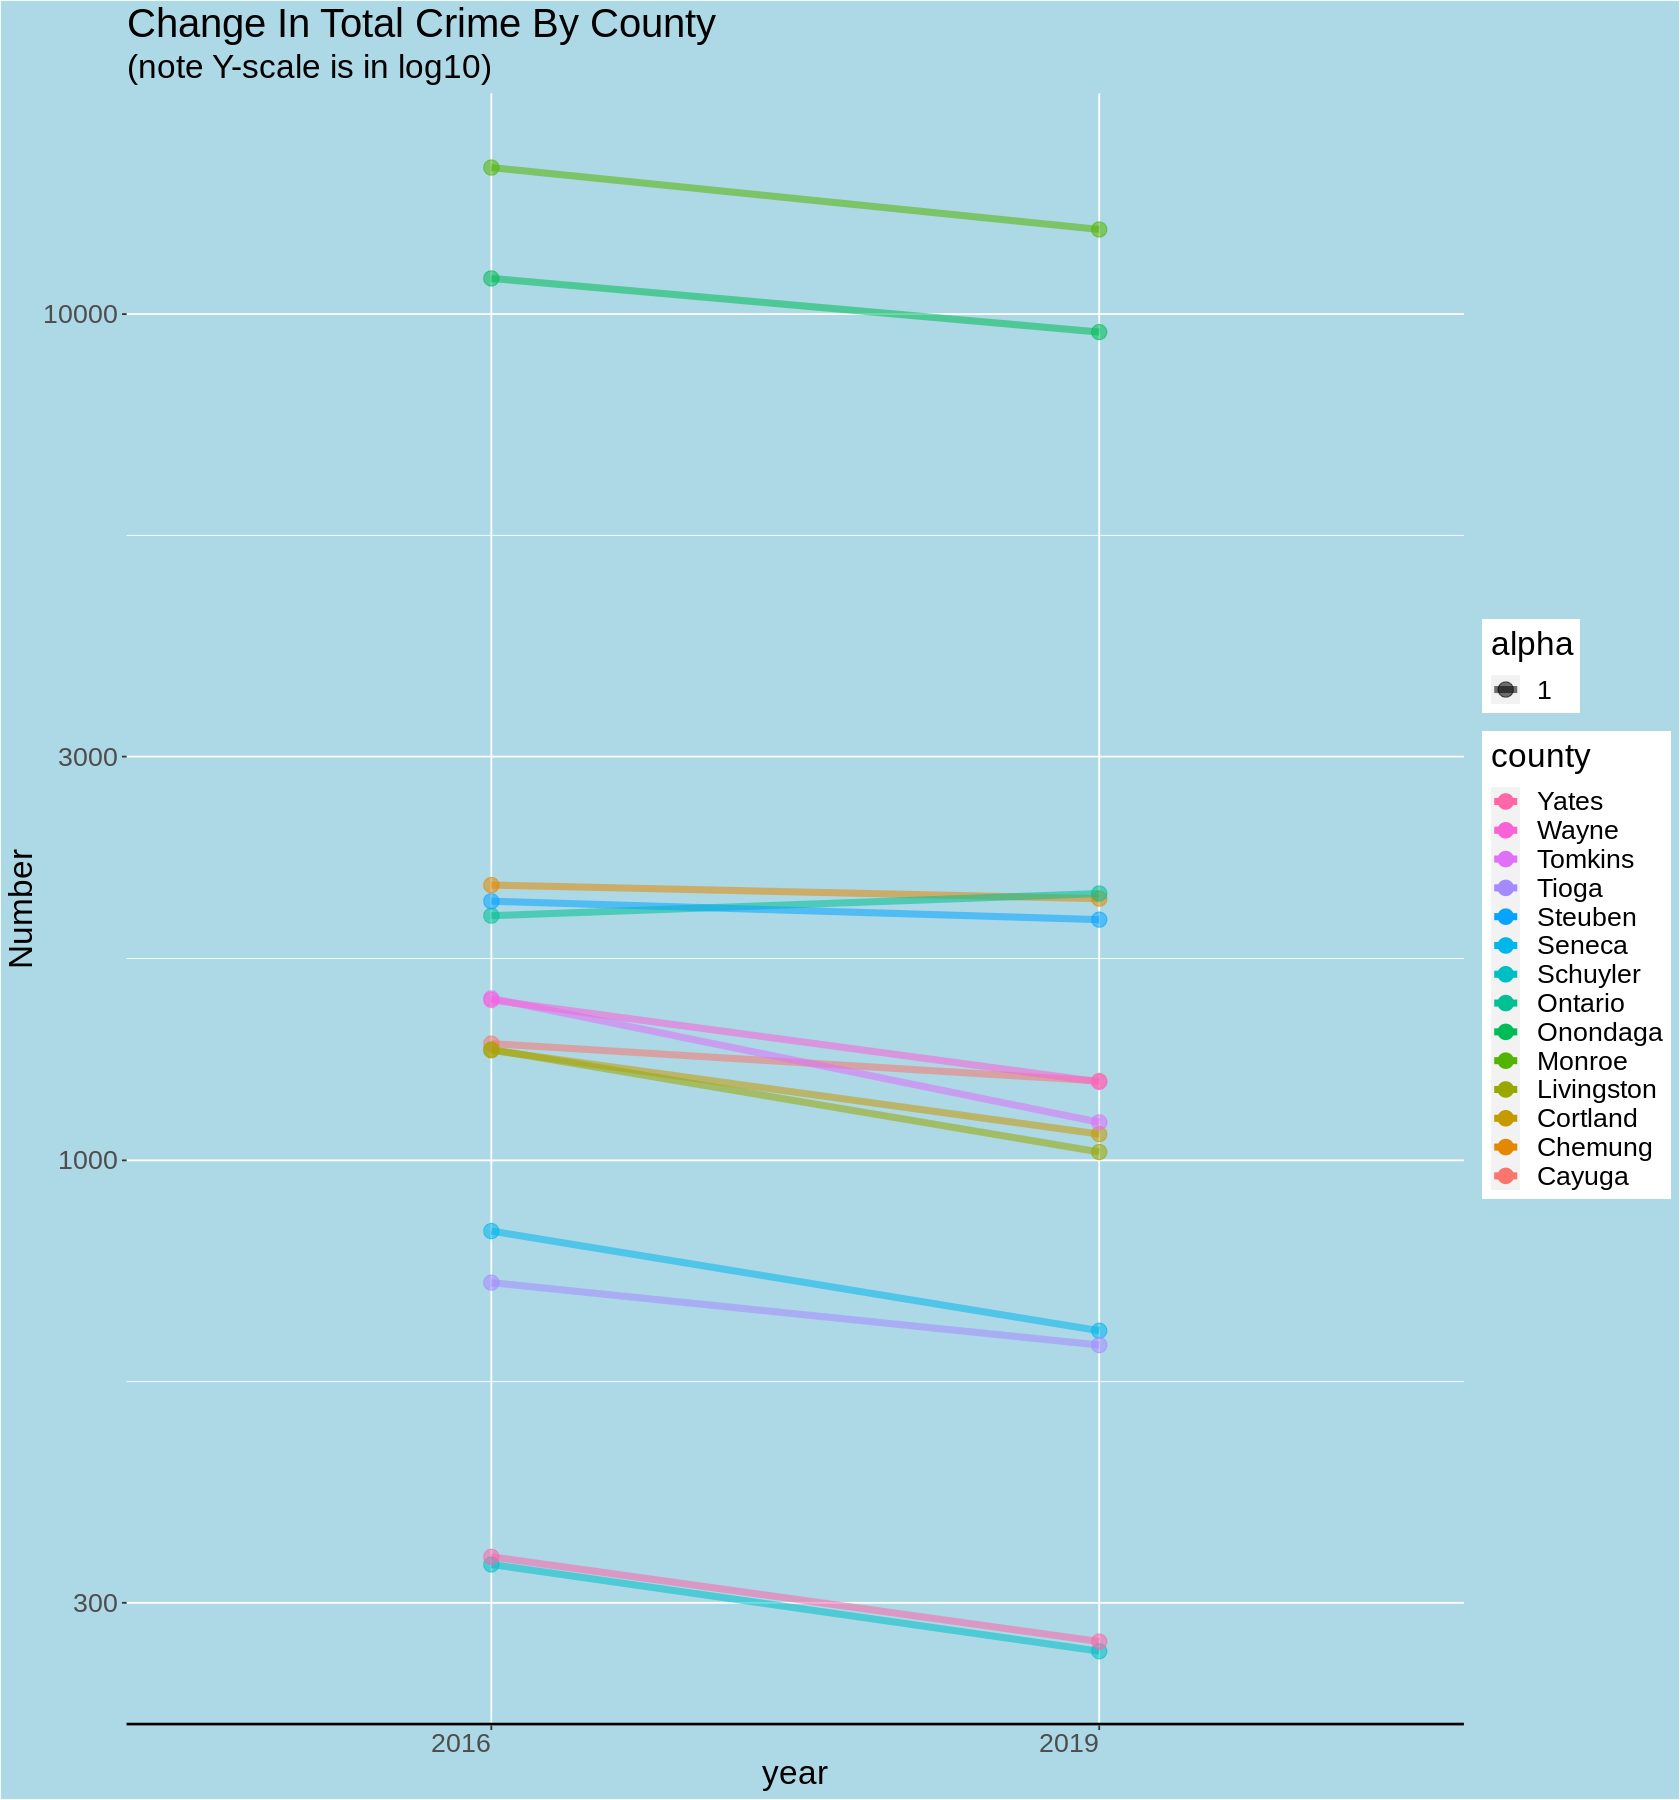

In [ ]:
# line segment slope
ggplot(data = County_Total_Arrest_select , aes(x = year, y = Number, group = county)) +
  geom_line(aes(color = county, alpha = 1), size = 2) +
  geom_point(aes(color = county, alpha = 1), size = 4)+
  geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Change In Total Crime By County",
                subtitle = "(note Y-scale is in log10)")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                      guides(colour = guide_legend(reverse=T))+
                      guides(colour = guide_legend(reverse=TRUE))+
                       scale_y_log10()

## Chart 5: Change Over Time For Gender

In [ ]:
head(CGR_gender_compiled_longer)

Year,County,Crime,Gender,Arrested
<fct>,<chr>,<chr>,<chr>,<int>
2016,Cayuga,Total Arrests,Male,969
2016,Cayuga,Total Arrests,Female,405
2016,Cayuga,Felony Total,Male,326
2016,Cayuga,Felony Total,Female,105
2016,Cayuga,Drug,Male,36
2016,Cayuga,Drug,Female,15


Filter for Total Arrests 

In [ ]:
Gender_County_Total_Arrest  <- CGR_gender_compiled_longer %>%
                filter(Crime == "Total Arrests"  )


In [ ]:
dim(Gender_County_Total_Arrest)

[1] 56  5

In [ ]:
head(Gender_County_Total_Arrest,2)
tail(Gender_County_Total_Arrest,2)


Year,County,Crime,Gender,Arrested
<fct>,<chr>,<chr>,<chr>,<int>
2016,Cayuga,Total Arrests,Male,969
2016,Cayuga,Total Arrests,Female,405


Year,County,Crime,Gender,Arrested
<fct>,<chr>,<chr>,<chr>,<int>
2019,Yates,Total Arrests,Male,205
2019,Yates,Total Arrests,Female,65


Split the df into female/male sets

In [ ]:
Gender_County_Total_Arrest_Female  <- Gender_County_Total_Arrest %>%
                filter(Gender  == "Female"  )

In [ ]:
dim(Gender_County_Total_Arrest_Female)

[1] 28  5

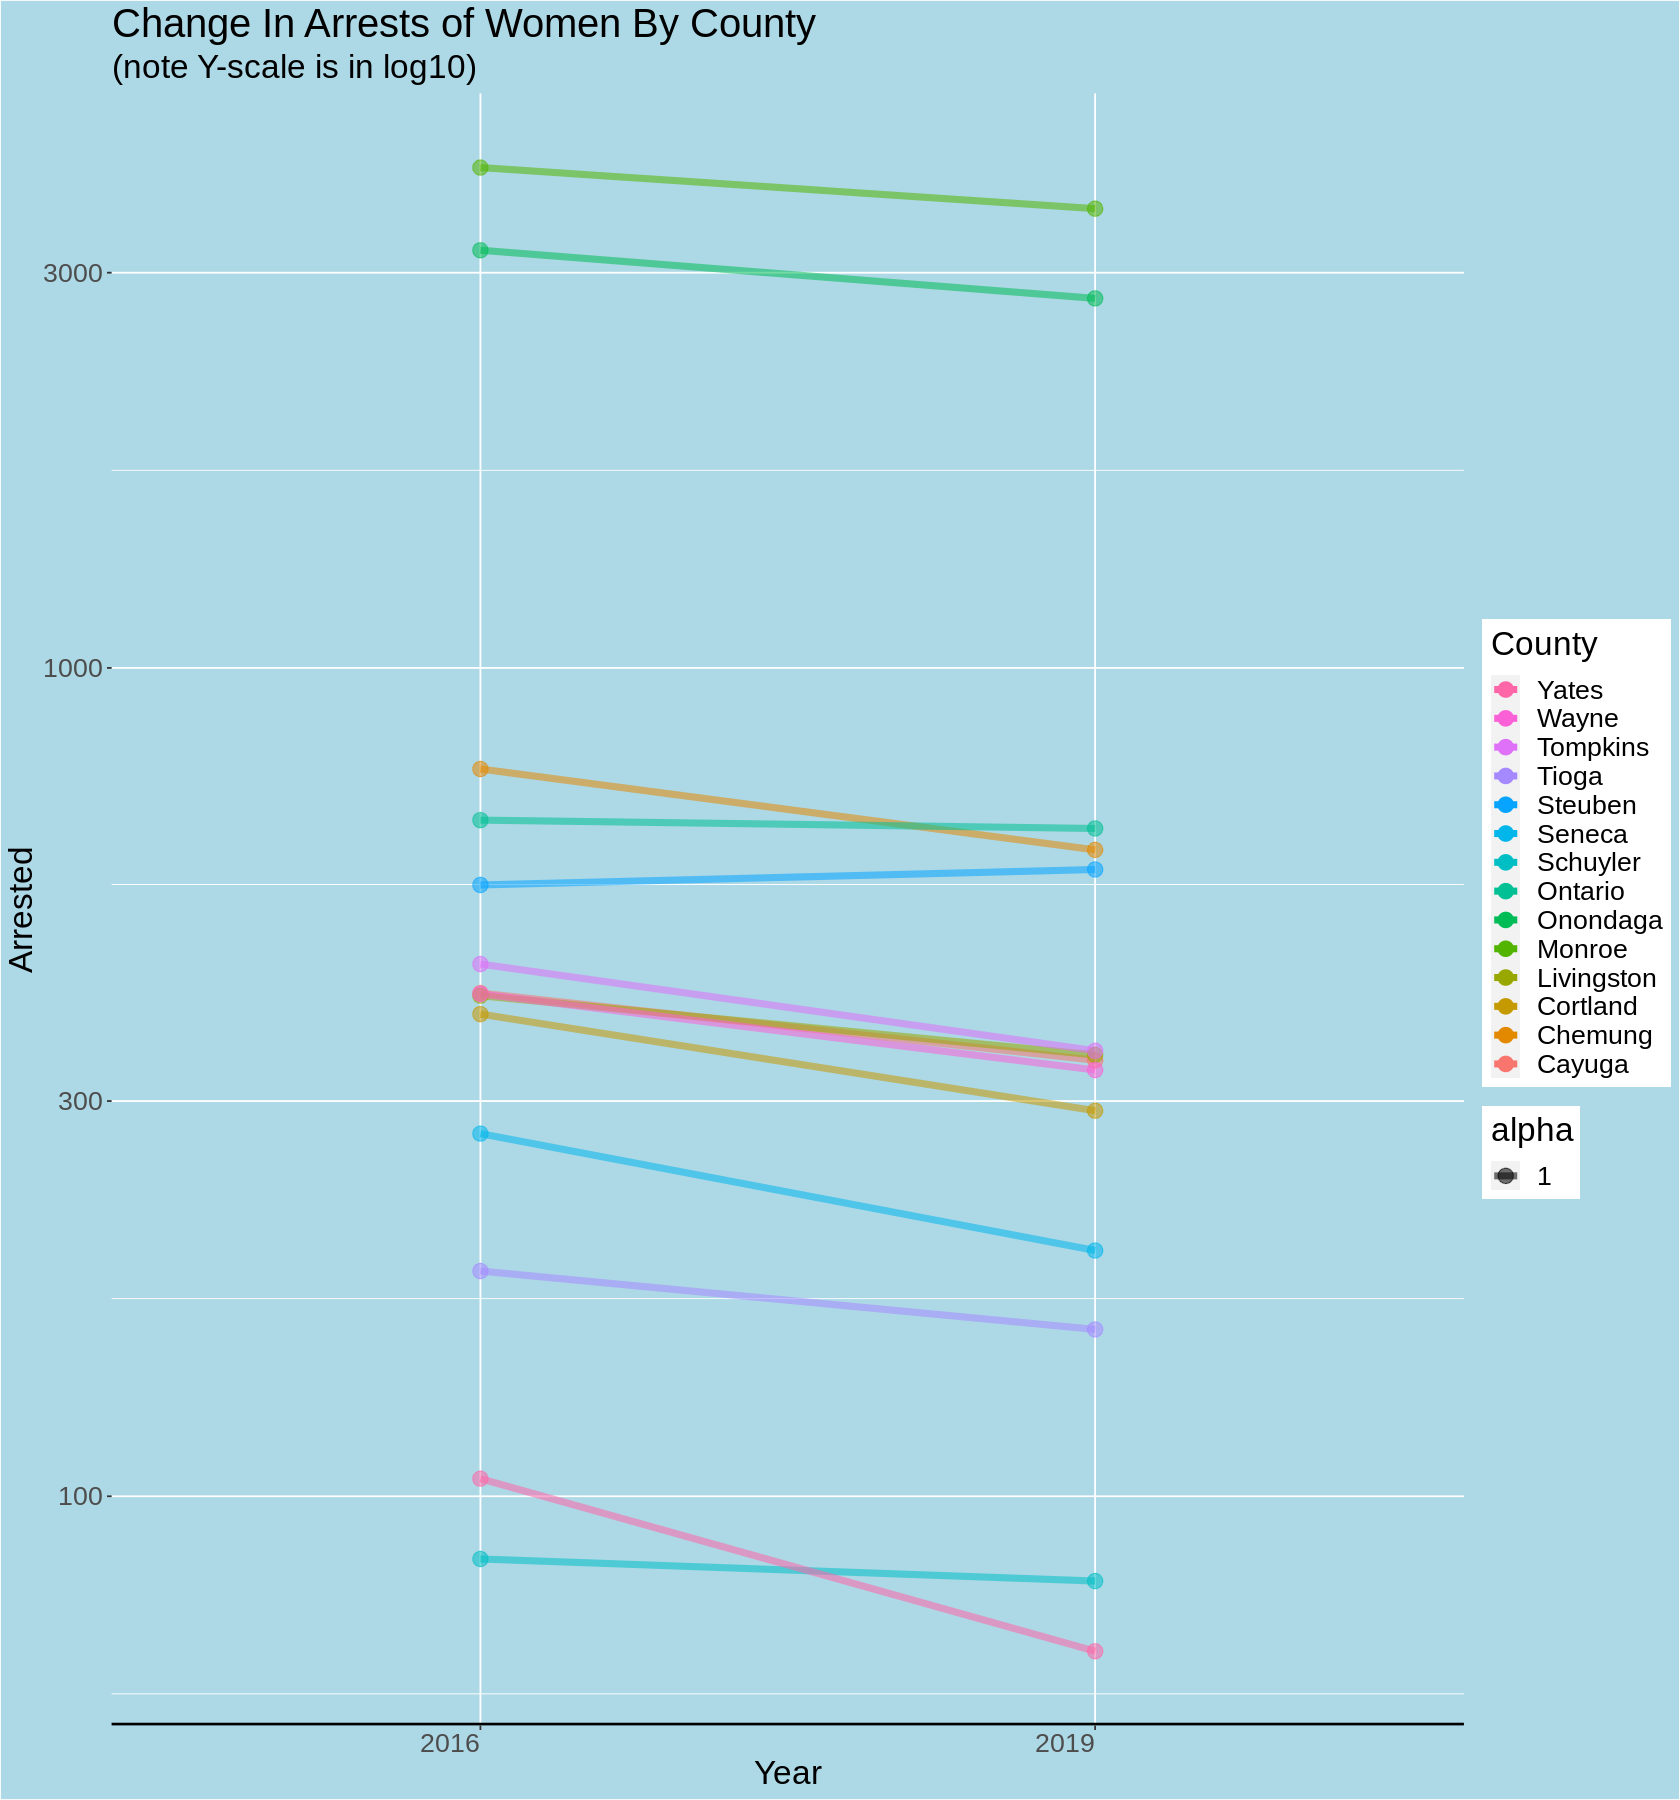

In [ ]:
# line segment slope
ggplot(data = Gender_County_Total_Arrest_Female , aes(x = Year, y = Arrested, group = County)) +
  geom_line(aes(color = County, alpha = 1), size = 2) +
  geom_point(aes(color = County, alpha = 1), size = 4)+
  geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Change In Arrests of Women By County",
                subtitle = "(note Y-scale is in log10)")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                      guides(colour = guide_legend(reverse=T))+
                      guides(colour = guide_legend(reverse=TRUE))+
                       scale_y_log10()

In [ ]:
Gender_County_Total_Arrest_Male  <- Gender_County_Total_Arrest %>%
                filter(Gender  == "Male"  )

In [ ]:
head(Gender_County_Total_Arrest_Male ,3)

Year,County,Crime,Gender,Arrested
<fct>,<chr>,<chr>,<chr>,<int>
2016,Cayuga,Total Arrests,Male,969
2016,Chemung,Total Arrests,Male,1360
2016,Cortland,Total Arrests,Male,967


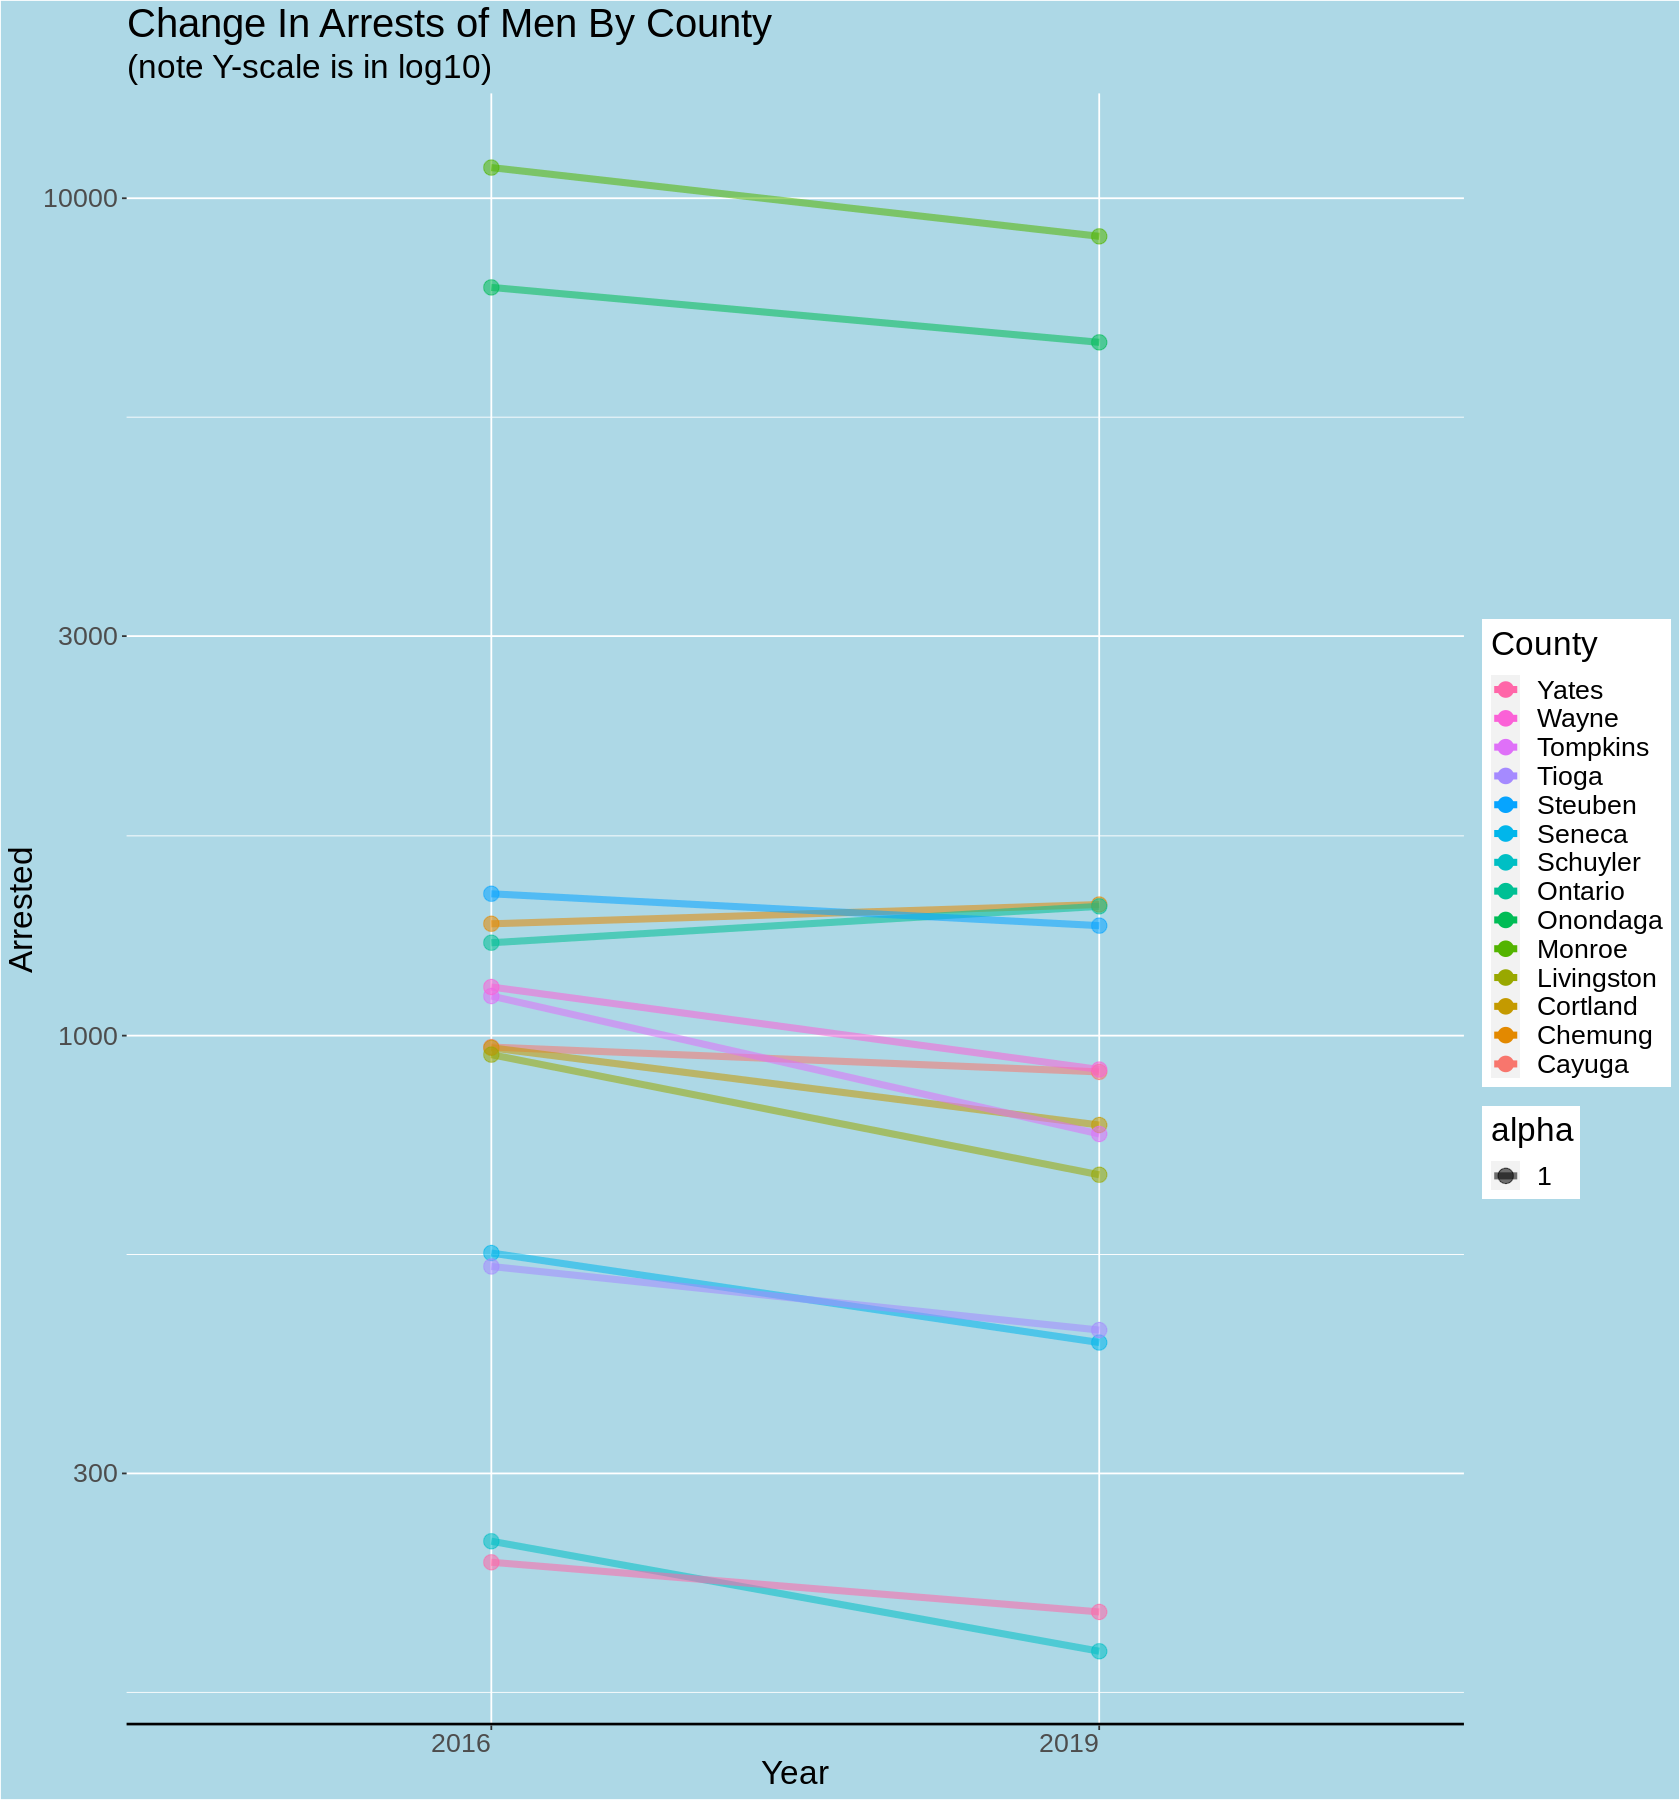

In [ ]:
# line segment slope
ggplot(data = Gender_County_Total_Arrest_Male , aes(x = Year, y = Arrested, group = County)) +
  geom_line(aes(color = County, alpha = 1), size = 2) +
  geom_point(aes(color = County, alpha = 1), size = 4)+
  geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Change In Arrests of Men By County",
                subtitle = "(note Y-scale is in log10)")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                      guides(colour = guide_legend(reverse=T))+
                      guides(colour = guide_legend(reverse=TRUE))+
                       scale_y_log10()

## Chart 6: Change Over Time Race

In [ ]:
head(Race_values_long,20)

Let us filter out the Race"pct's"

In [89]:
# First filter out the non pct data
target<- c("Black","Hispanic","Asian","White","Other.Unknown")

In [90]:
Race_Change_County <- filter(Race_values_long, Race %in% target)

In [91]:
Race_Change_County  <- Race_Change_County %>%
                filter(crime  == "Total Arrests"  )

In [92]:
head(Race_Change_County,3)
tail(Race_Change_County,3)

county,year,crime,Race,Number
<chr>,<fct>,<chr>,<chr>,<dbl>
Cayuga,2016,Total Arrests,White,1071
Cayuga,2016,Total Arrests,Black,240
Cayuga,2016,Total Arrests,Hispanic,42


county,year,crime,Race,Number
<chr>,<fct>,<chr>,<chr>,<dbl>
Yates,2019,Total Arrests,Hispanic,9
Yates,2019,Total Arrests,Asian,0
Yates,2019,Total Arrests,Other.Unknown,1


In [93]:
dim(Race_Change_County )

[1] 140   5

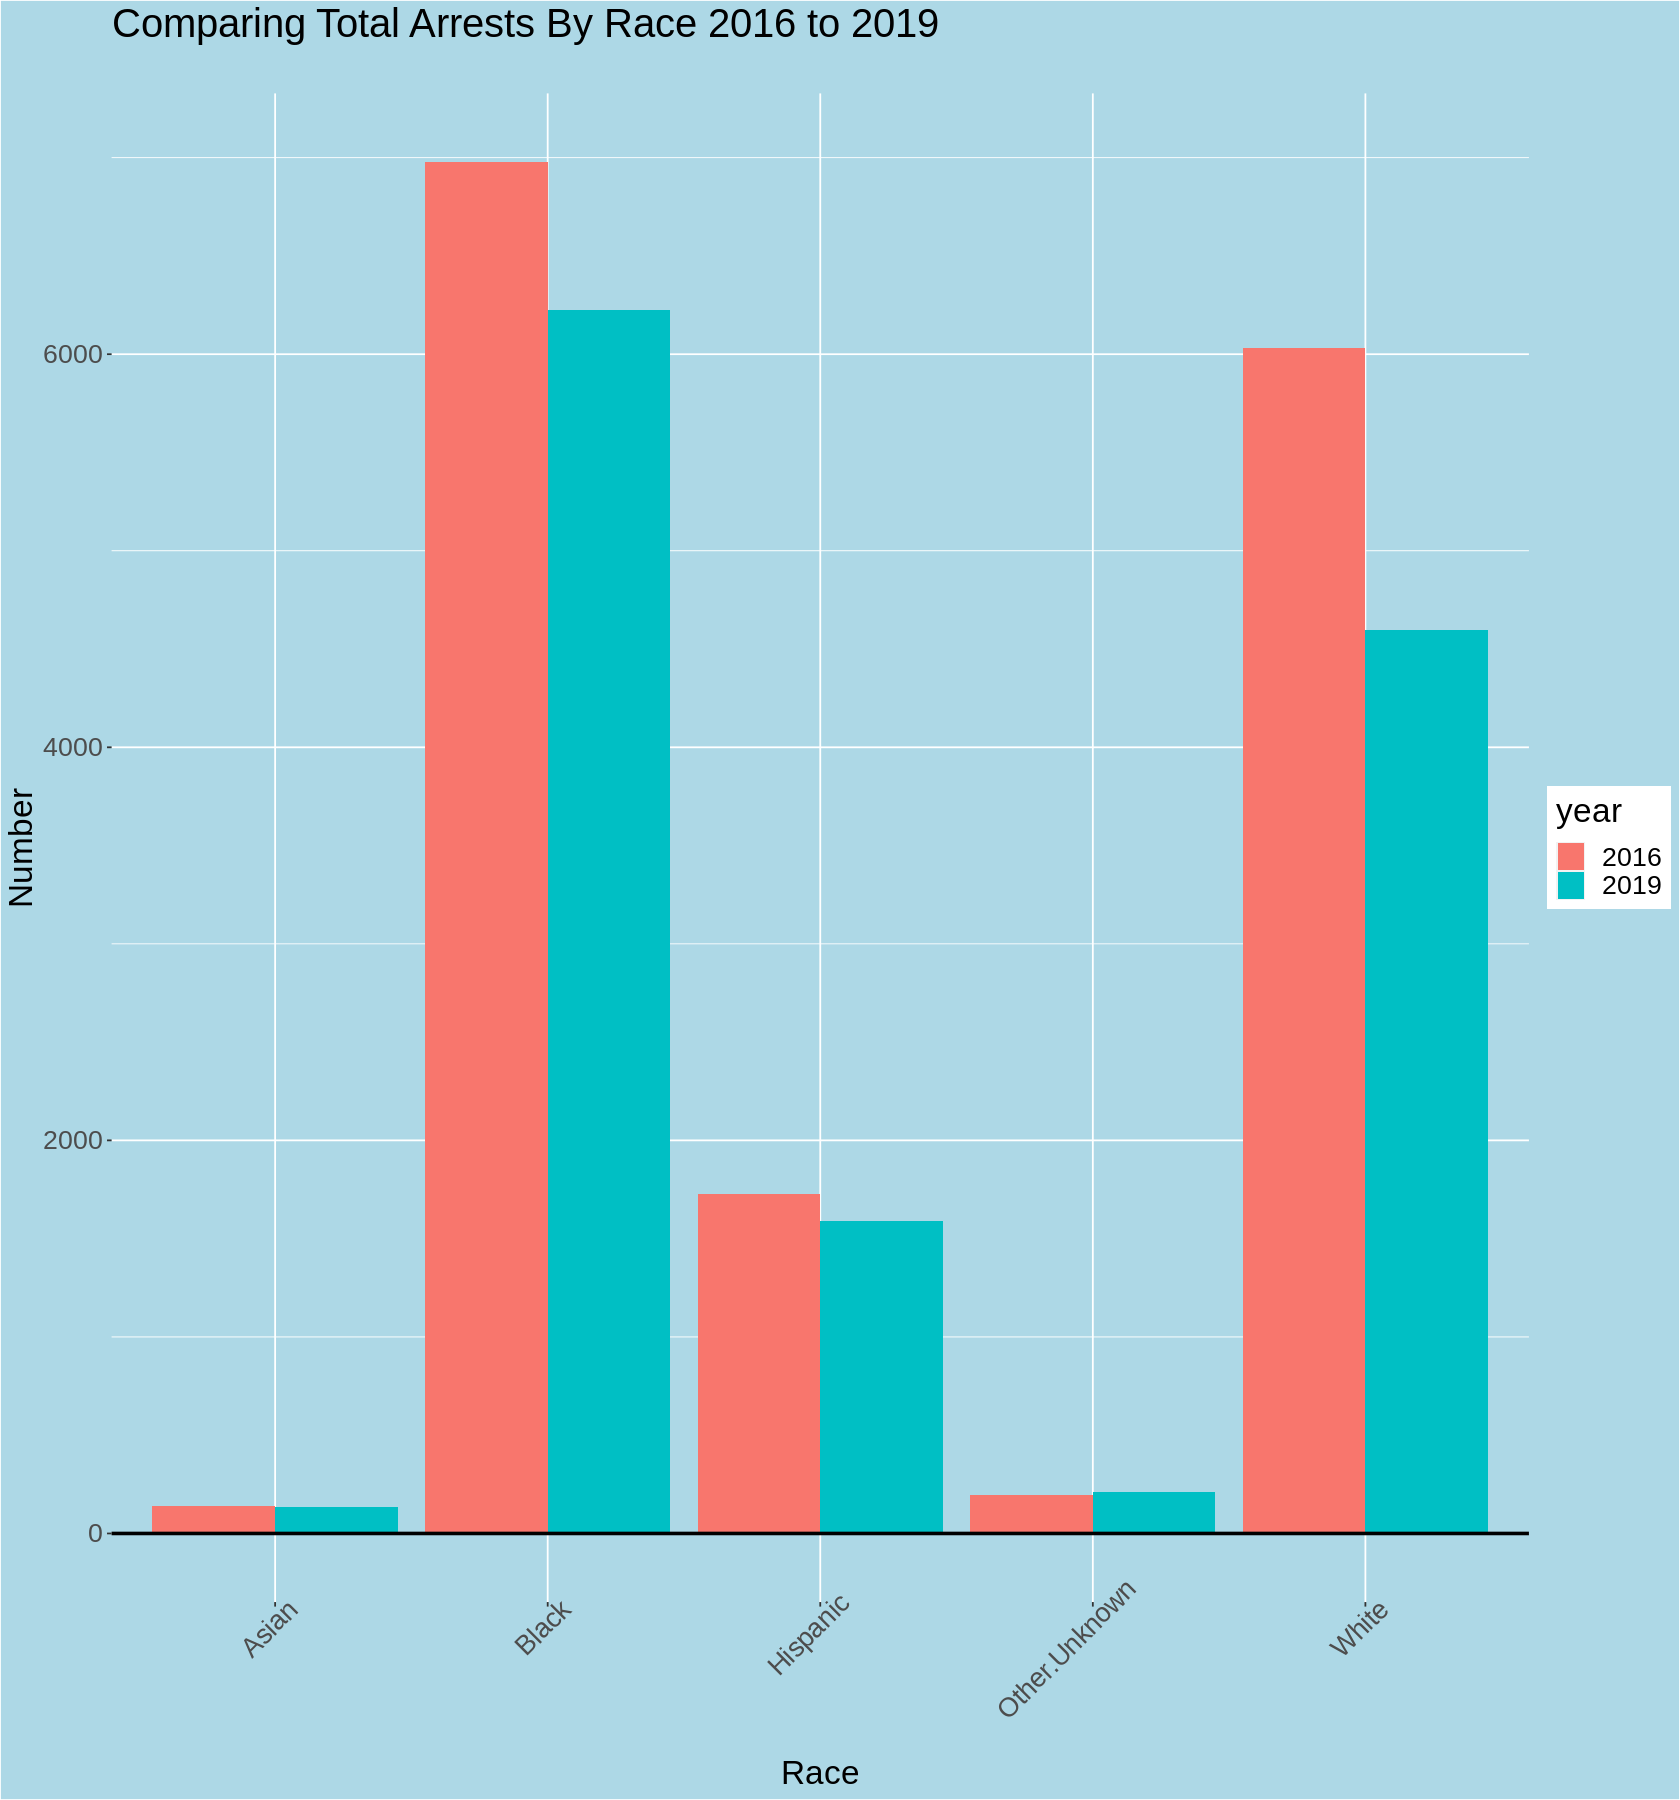

In [95]:
Race_Year_Over_Year <- ggplot(Race_Change_County, aes(Race, Number )) +
                              geom_bar(aes(fill= year)  ,stat = "identity",position = "dodge")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Total Arrests By Race 2016 to 2019",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= FALSE))+
                 geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)
Race_Year_Over_Year

# Other Charts

## **Absolute change in Total Crime By County**

In [217]:
head(gender_pct)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeMaleCorrected,PctChangeFemale,PctChangeFemaleCorrected,TotalChange,ChangeMale,ChangeMalePct,ChangeFemale
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<lgl>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0,2019,Cayuga,Total Arrests,⋯,0.9032023,-0.09679767,0.9339525284,-0.06604747162,0.8296296,-0.17037037,-133,-64,NA,-69
2,2016,Cayuga,Felony Total,431,326,105,0,2019,Cayuga,Felony Total,⋯,0.9535963,-0.04640371,0.9478527607,-0.05214723926,0.9714286,-0.02857143,-20,-17,NA,-3
3,2016,Cayuga,Drug,51,36,15,0,2019,Cayuga,Drug,⋯,1.2941176,0.29411765,1.194444444,0.1944444444,1.5333333,0.53333333,15,7,NA,8
4,2016,Cayuga,Violent,104,88,16,0,2019,Cayuga,Violent,⋯,0.5769231,-0.42307692,0.5227272727,-0.4772727273,0.8750000,-0.12500000,-44,-42,NA,-2
5,2016,Cayuga,DWI,38,25,13,0,2019,Cayuga,DWI,⋯,0.6578947,-0.34210526,0.72,-0.28,0.5384615,-0.46153846,-13,-7,NA,-6
6,2016,Cayuga,Other,238,177,61,0,2019,Cayuga,Other,⋯,1.0924370,0.09243697,1.141242938,0.1412429379,0.9508197,-0.04918033,22,25,NA,-3


In [218]:
#Filter  for Total Arrests
ChangeInCrimeByCoutny <- gender_pct %>%
              filter(Crime == "Total Arrests")

In [219]:
dim(ChangeInCrimeByCoutny)

[1] 14 25

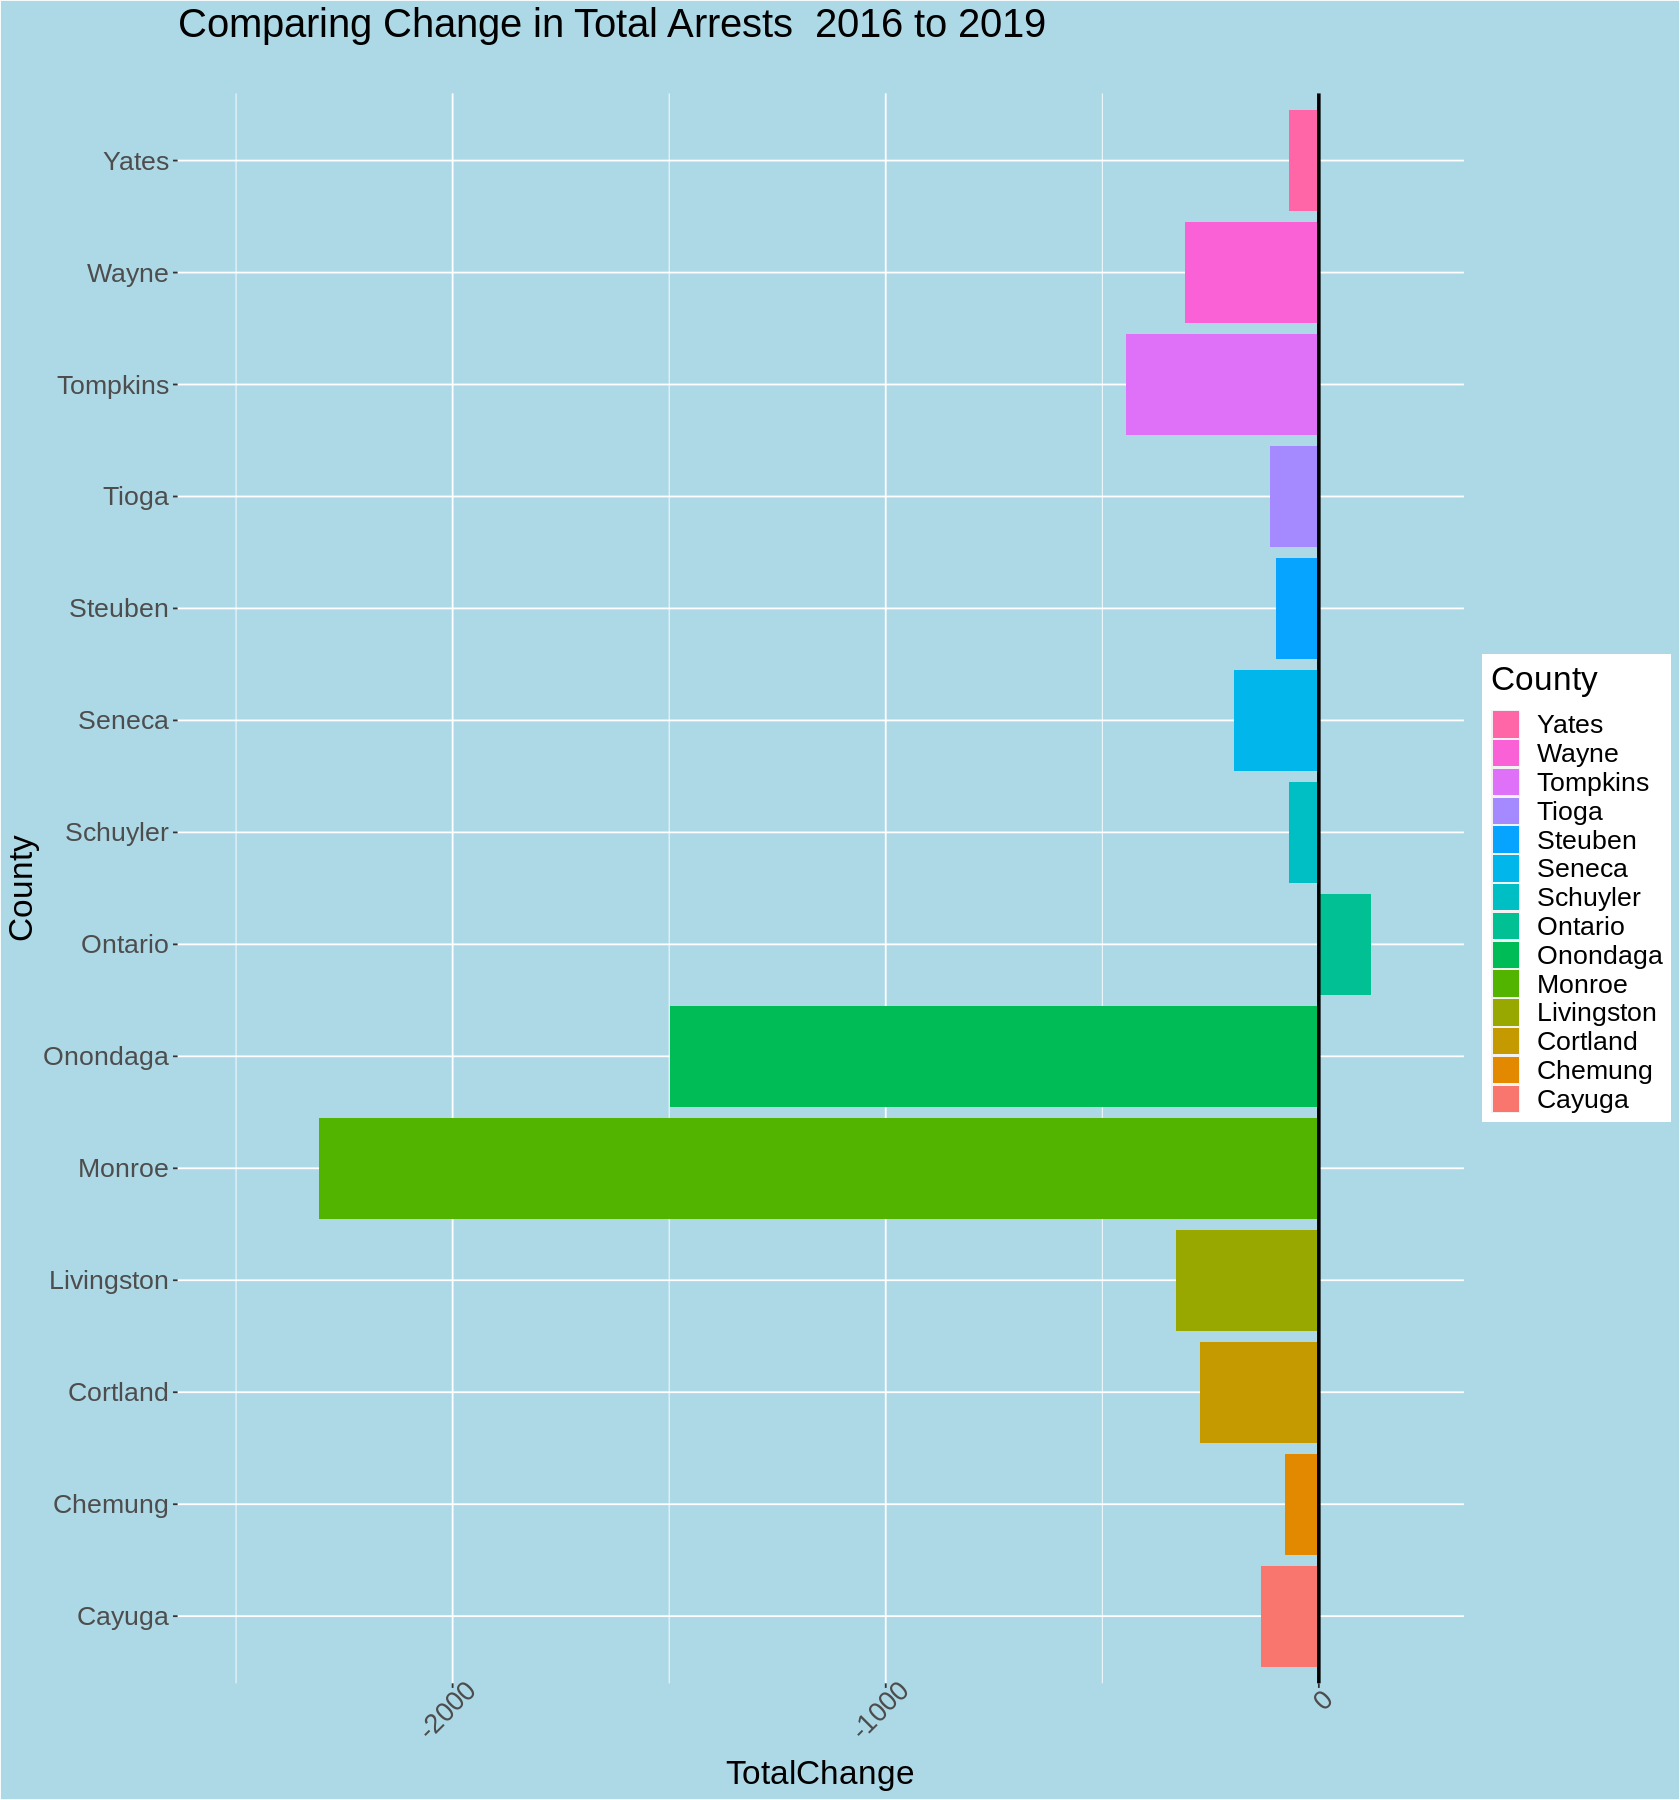

In [221]:

ggplot(ChangeInCrimeByCoutny, aes(x= County , y = TotalChange , fill = County)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-2500,200)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Comparing Total Arrests By Race 2016 to 2019",
                subtitle = "")+
                coord_flip()+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Change in Total Arrests  2016 to 2019",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= TRUE))

## Comparing Each Crime Category by County

In [ ]:
head(gender_pct,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeMaleCorrected,PctChangeFemale,PctChangeFemaleCorrected,TotalChange,ChangeMale,ChangeMalePct,ChangeFemale
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<lgl>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0,2019,Cayuga,Total Arrests,⋯,0.9032023,-0.09679767,0.9339525284,-0.06604747162,0.8296296,-0.17037037,-133,-64,NA,-69
2,2016,Cayuga,Felony Total,431,326,105,0,2019,Cayuga,Felony Total,⋯,0.9535963,-0.04640371,0.9478527607,-0.05214723926,0.9714286,-0.02857143,-20,-17,NA,-3
3,2016,Cayuga,Drug,51,36,15,0,2019,Cayuga,Drug,⋯,1.2941176,0.29411765,1.194444444,0.1944444444,1.5333333,0.53333333,15,7,NA,8


Coordinate system already present. Adding new coordinate system, which will replace the existing one.



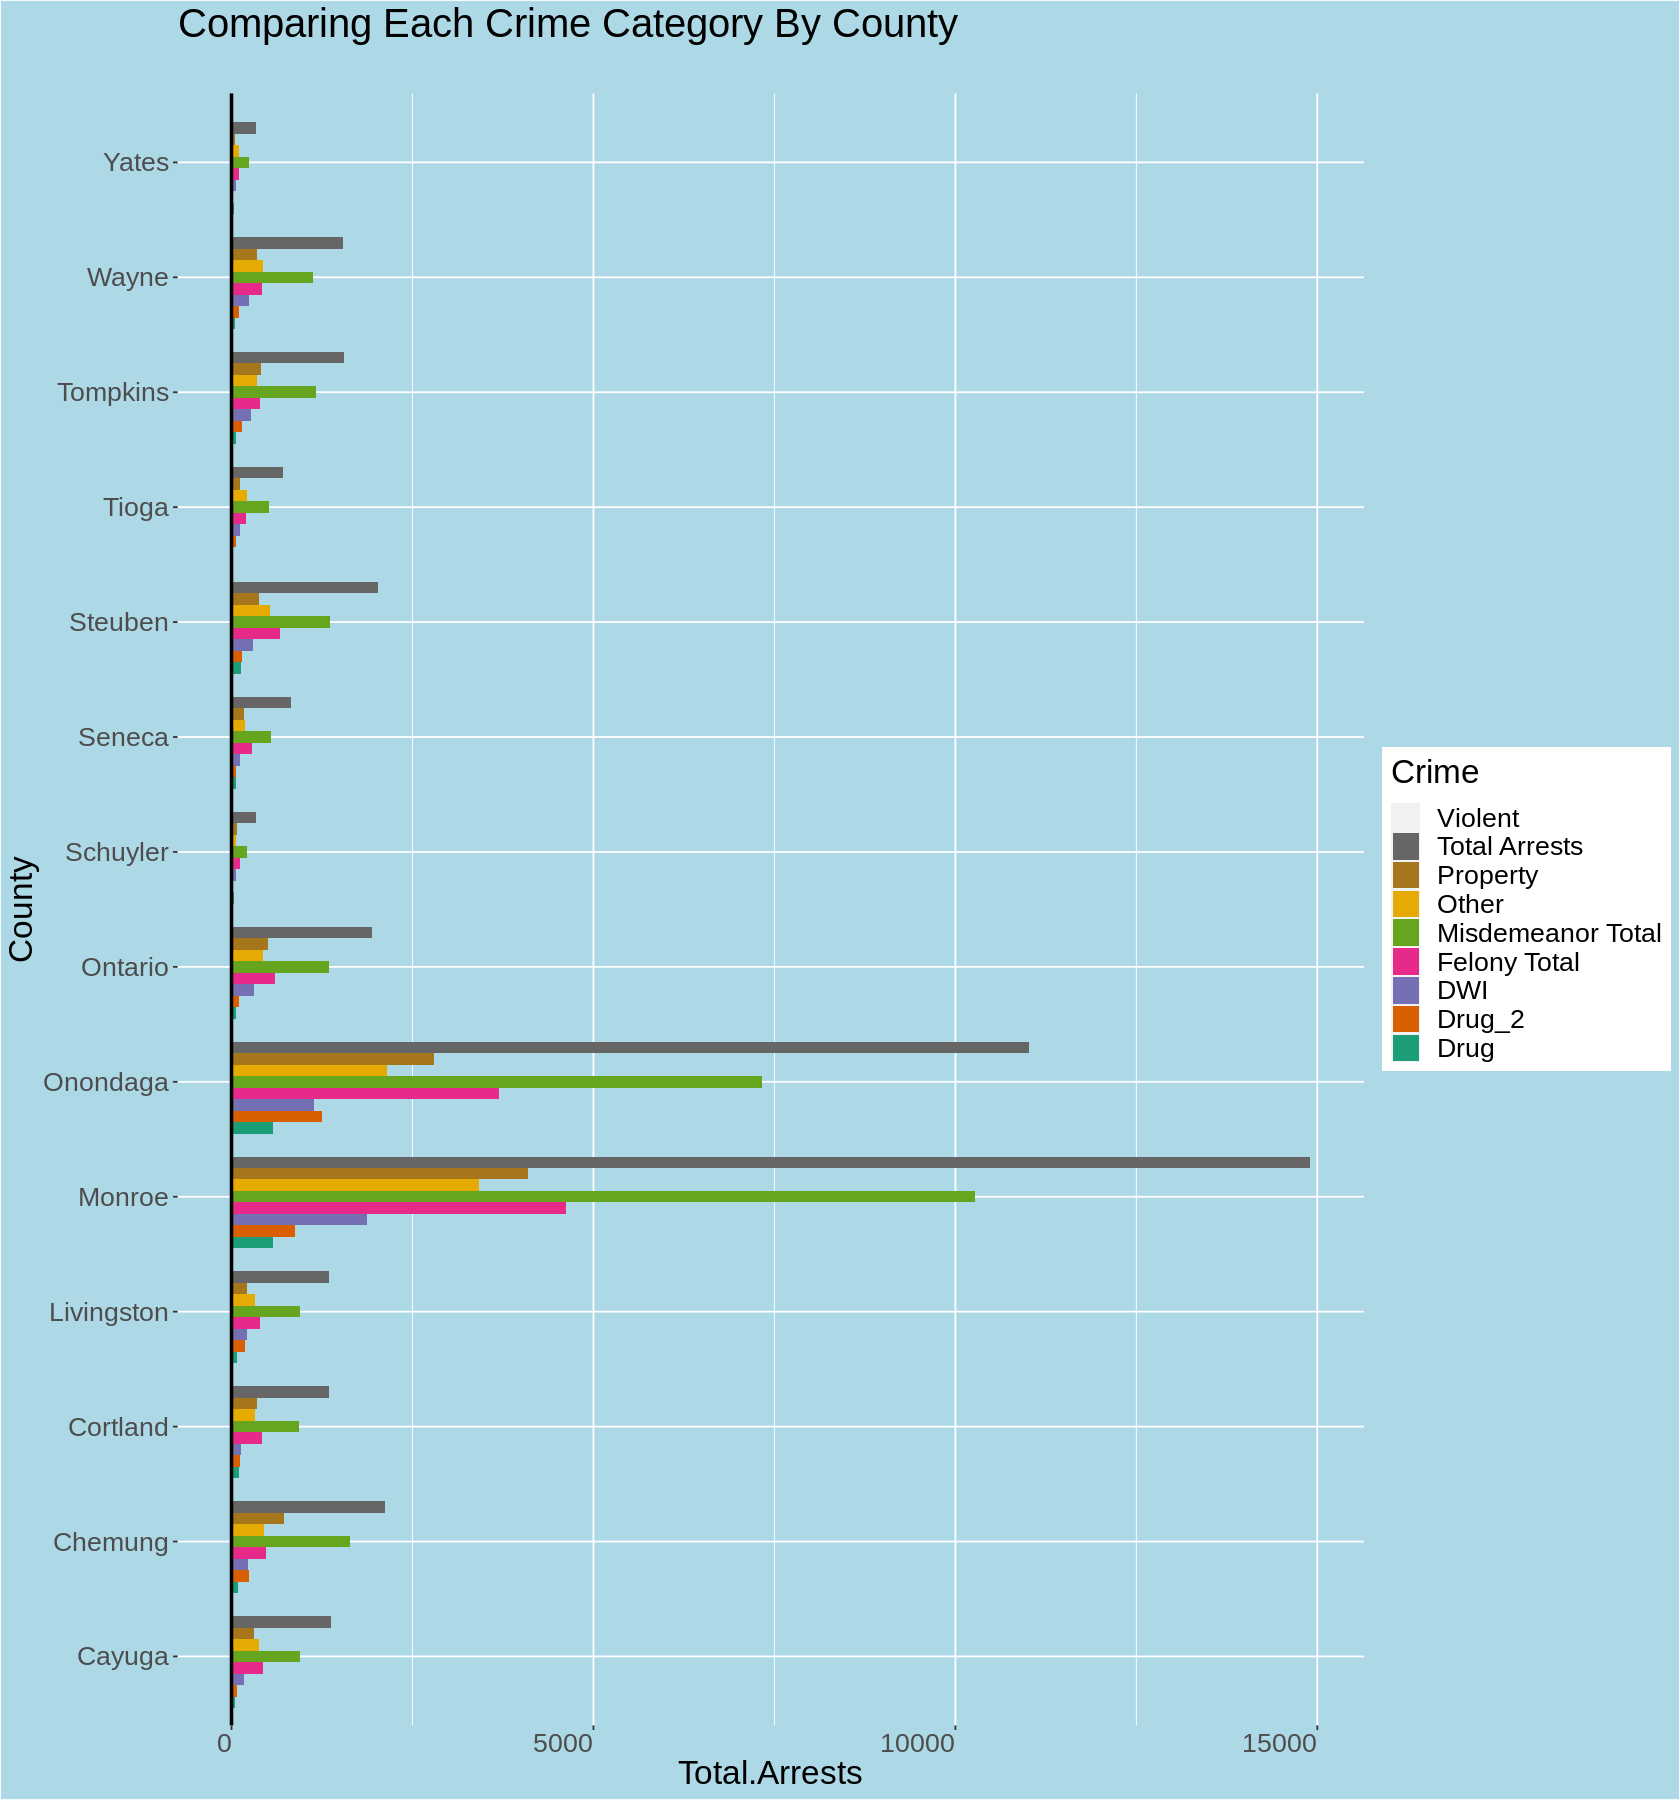

In [84]:
ggplot(gender_pct, aes(County, Total.Arrests   , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=TRUE))+
                      coord_flip()+
                      geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)

## Comparing Changes in Crimes As Divergent Bar Chart

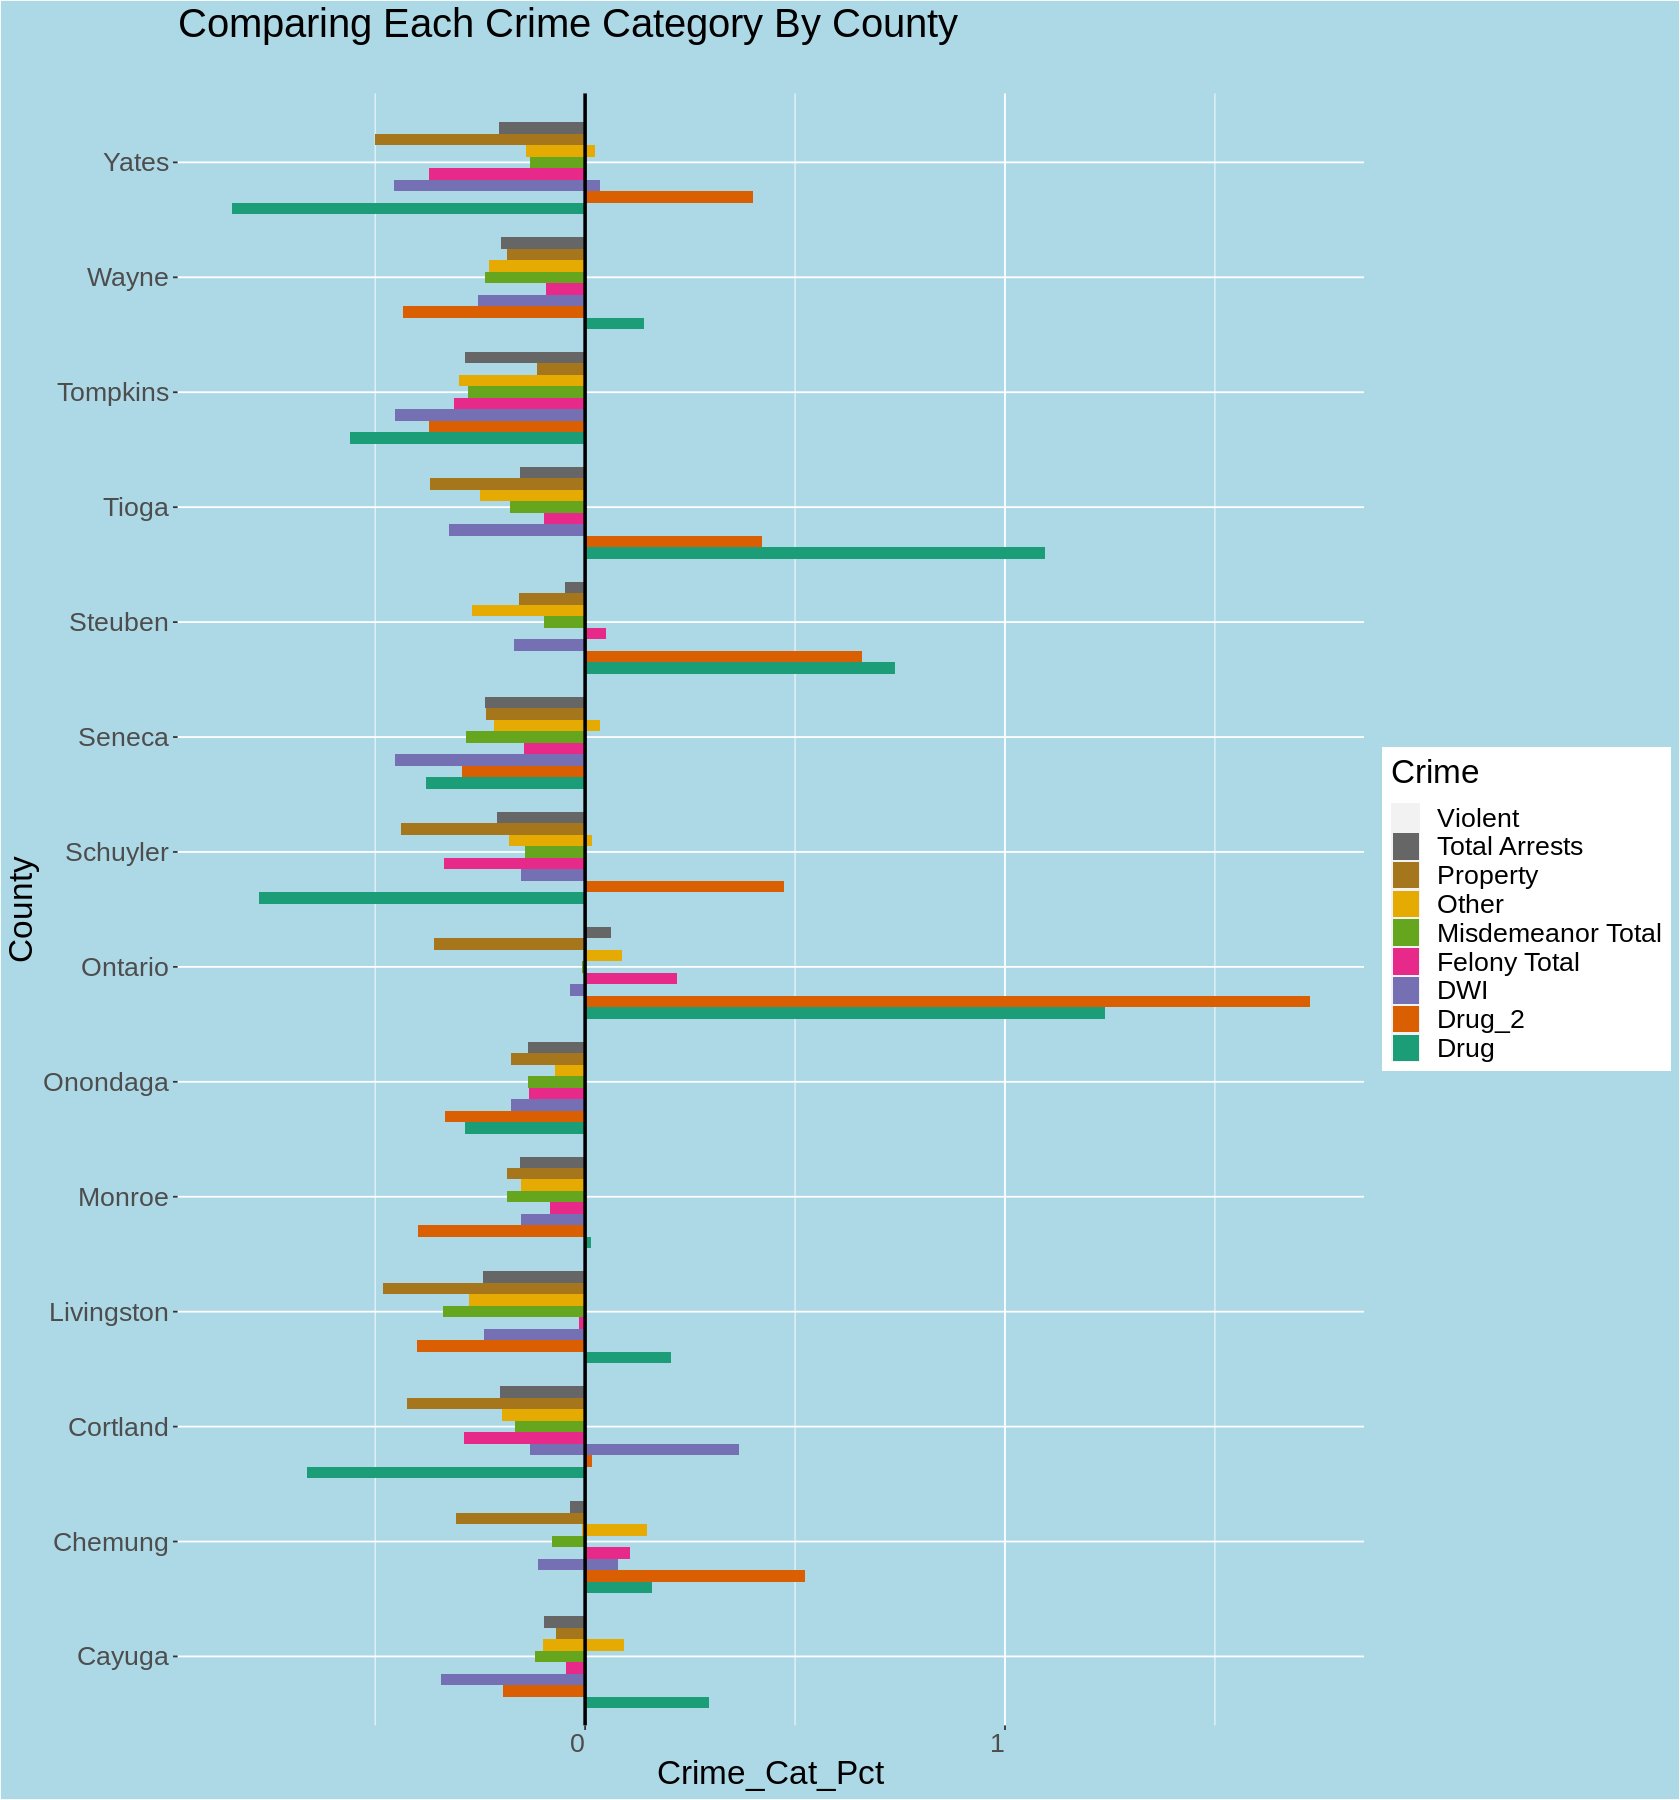

In [ ]:
ggplot(gender_pct, aes(County, Crime_Cat_Pct  , fill = Crime)) +
                              geom_bar(stat = "identity",width = 0.9, position = "dodge")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)+
                guides(fill = guide_legend(reverse=TRUE))+
                coord_flip()

## Comparing changes in Crime Gridwise

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



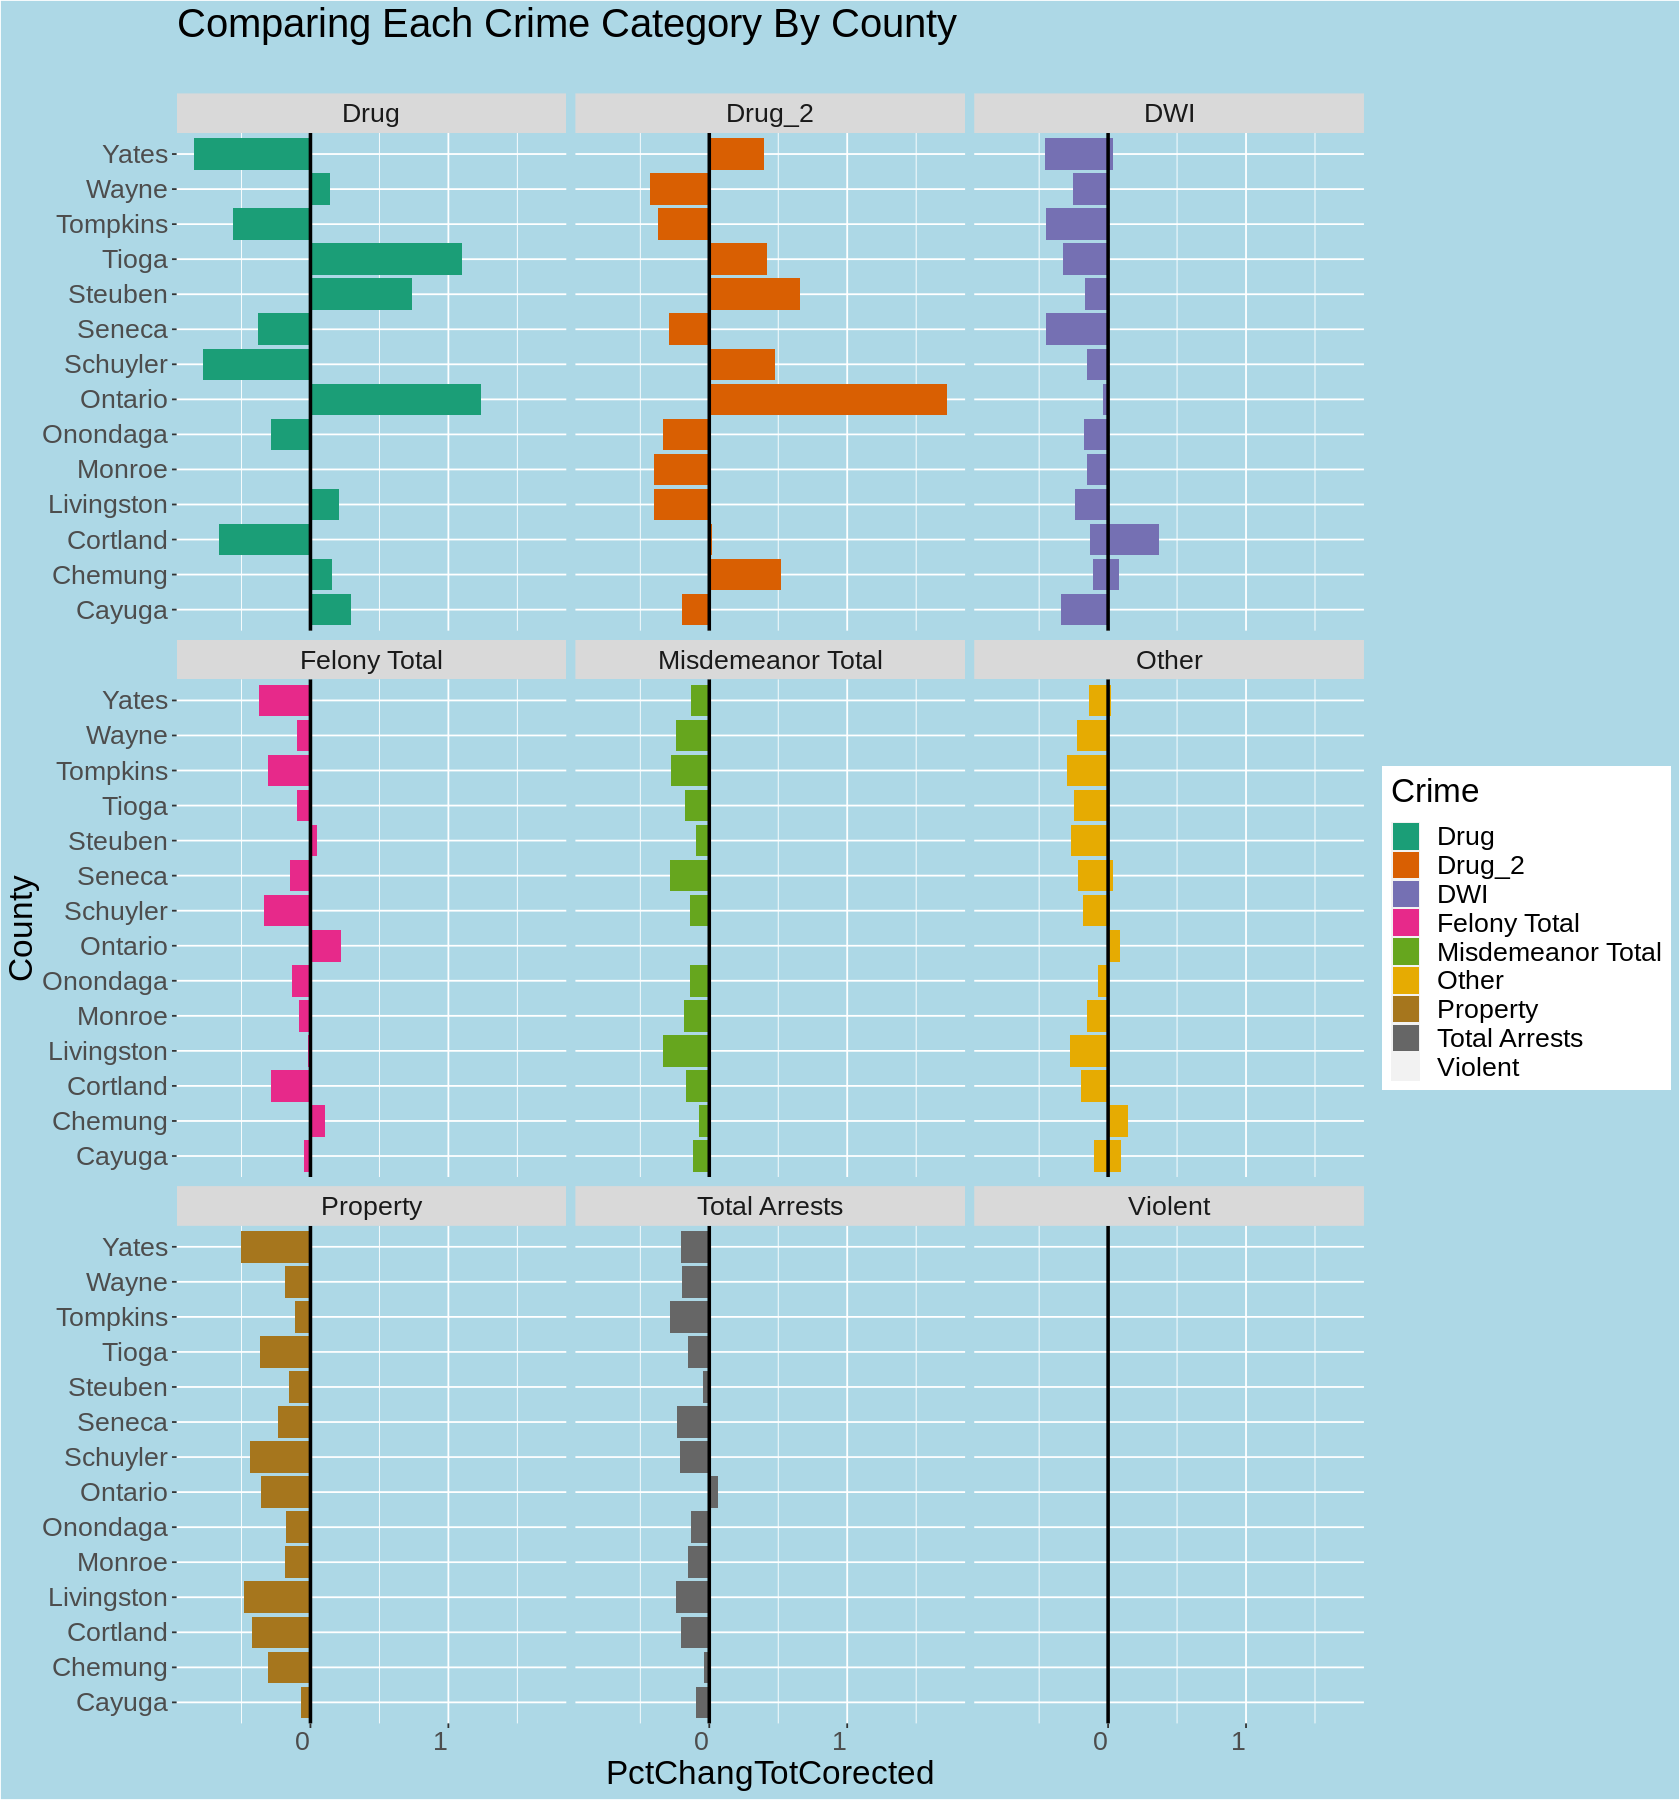

In [82]:
ggplot(gender_pct, aes(County, PctChangTotCorected , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=FALSE))+
                      coord_flip()+
                      facet_wrap(~Crime)+
                      geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)

## Percent change By Race

In [43]:
head(Race_values_Pct_Change,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,⋯,BlackPctDiff,Hispanic_19,HispanicPct_19,HispanicPctDiff,Asian_19,AsianPct_19,AsianPctDiff,Other.Unknown_19,OtherPct_19,OthrPctDiff
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,⋯,0.1717566479,56,0.04512490,0.4762288475,1,0.0008058018,-0.4464141822,5,0.004029009,-0.7086390432
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,⋯,0.2766317568,25,0.06082725,1.184712084,0,0.0000000000,#DIV/0!,3,0.007299270,0.5729927006
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,⋯,0.1107954546,5,0.07575758,2.863636363,0,0.0000000000,#DIV/0!,1,0.015151515,-0.2272727275


In [44]:
Race_values_Pct_Change  <- Race_values_Pct_Change %>%
                filter(crime  == "Total Arrests")
dim(Race_values_Pct_Change)

[1] 14 33

In [ ]:
Race_values_Pct_Change

In [48]:
dim(Race_values_Pct_Change)

[1] 14 33

In [68]:
head(Race_values_Pct_Change,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,⋯,BlackPctDiff,Hispanic_19,HispanicPct_19,HispanicPctDiff,Asian_19,AsianPct_19,AsianPctDiff,Other.Unknown_19,OtherPct_19,OthrPctDiff
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,⋯,0.1717566479,56,0.04512490,0.4762288475,1,0.0008058018,-0.4464141822,5,0.004029009,-0.7086390432
2,Chemung,2016,Total Arrests,2115,1553,0.7342790,466,0.2203310,79,0.03735225,⋯,0.03555513882,89,0.04367026,0.1691469673,7,0.0034347399,1.421491659,10,0.004906771,-0.2587270434
3,Cortland,2016,Total Arrests,1349,1094,0.8109711,174,0.1289844,62,0.04595997,⋯,-0.003820715329,52,0.04841713,0.05346308649,4,0.0037243948,0.004841713167,7,0.006517691,-0.3719739292


In [69]:
Race_values_Pct_Change  <- Race_values_Pct_Change %>%
                filter(crime  == "Total Arrests")
dim(Race_values_Pct_Change)

[1] 14 33

In [70]:
Race_values_Pct_Change_select <- Race_values_Pct_Change %>%
                    select(county,BlackPctDiff, HispanicPctDiff , AsianPctDiff , OthrPctDiff ,WhitePctDiff )

In [71]:
head(Race_values_Pct_Change_select)

,county,BlackPctDiff,HispanicPctDiff,AsianPctDiff,OthrPctDiff,WhitePctDiff
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Cayuga,0.1717566479,0.4762288475,-0.4464141822,-0.7086390432,-0.043759325
2,Chemung,0.03555513882,0.1691469673,1.421491659,-0.2587270434,-0.019686801
3,Cortland,-0.003820715329,0.05346308649,0.004841713167,-0.3719739292,0.002315831
4,Livingston,0.2620714556,0.01159745617,-0.3391984359,-0.2951449986,-0.019568428
5,Monroe,0.2057433558,0.1355876754,0.06326313535,1.906912982,-0.285488818
6,Onondaga,0.2031826473,0.366994646,0.3081619651,0.3884759909,-0.209345039


In [72]:
Race_values_Pct_Change_select$AsianPctDiff <- as.numeric(Race_values_Pct_Change_select$AsianPctDiff)
Race_values_Pct_Change_select$BlackPctDiff <- as.numeric(Race_values_Pct_Change_select$BlackPctDiff)
Race_values_Pct_Change_select$HispanicPctDiff <- as.numeric(Race_values_Pct_Change_select$HispanicPctDiff)
Race_values_Pct_Change_select$OthrPctDiff <- as.numeric(Race_values_Pct_Change_select$OthrPctDiff)
Race_values_Pct_Change_select$WhitePctDiff <- as.numeric(Race_values_Pct_Change_select$WhitePctDiff)



In [73]:
Race_values_Pct_Change_select$county <- as.factor(Race_values_Pct_Change_select$county)

In [ ]:
#CGR_gender_compiled_longer <- pivot_longer(CGR_gender_compiled, cols = 4:7,names_to= "Gender", values_to = "Arrested")

In [74]:
Race_values_Pct_Change_longer <- pivot_longer(Race_values_Pct_Change_select, cols = 2:6,names_to= "Race", values_to = "Change")

In [75]:
head(Race_values_Pct_Change_longer)

county,Race,Change
<fct>,<chr>,<dbl>
Cayuga,BlackPctDiff,0.17175665
Cayuga,HispanicPctDiff,0.47622885
Cayuga,AsianPctDiff,-0.44641418
Cayuga,OthrPctDiff,-0.70863904
Cayuga,WhitePctDiff,-0.04375932
Chemung,BlackPctDiff,0.03555514


In [ ]:
Race_values_Pct_Change_longer

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



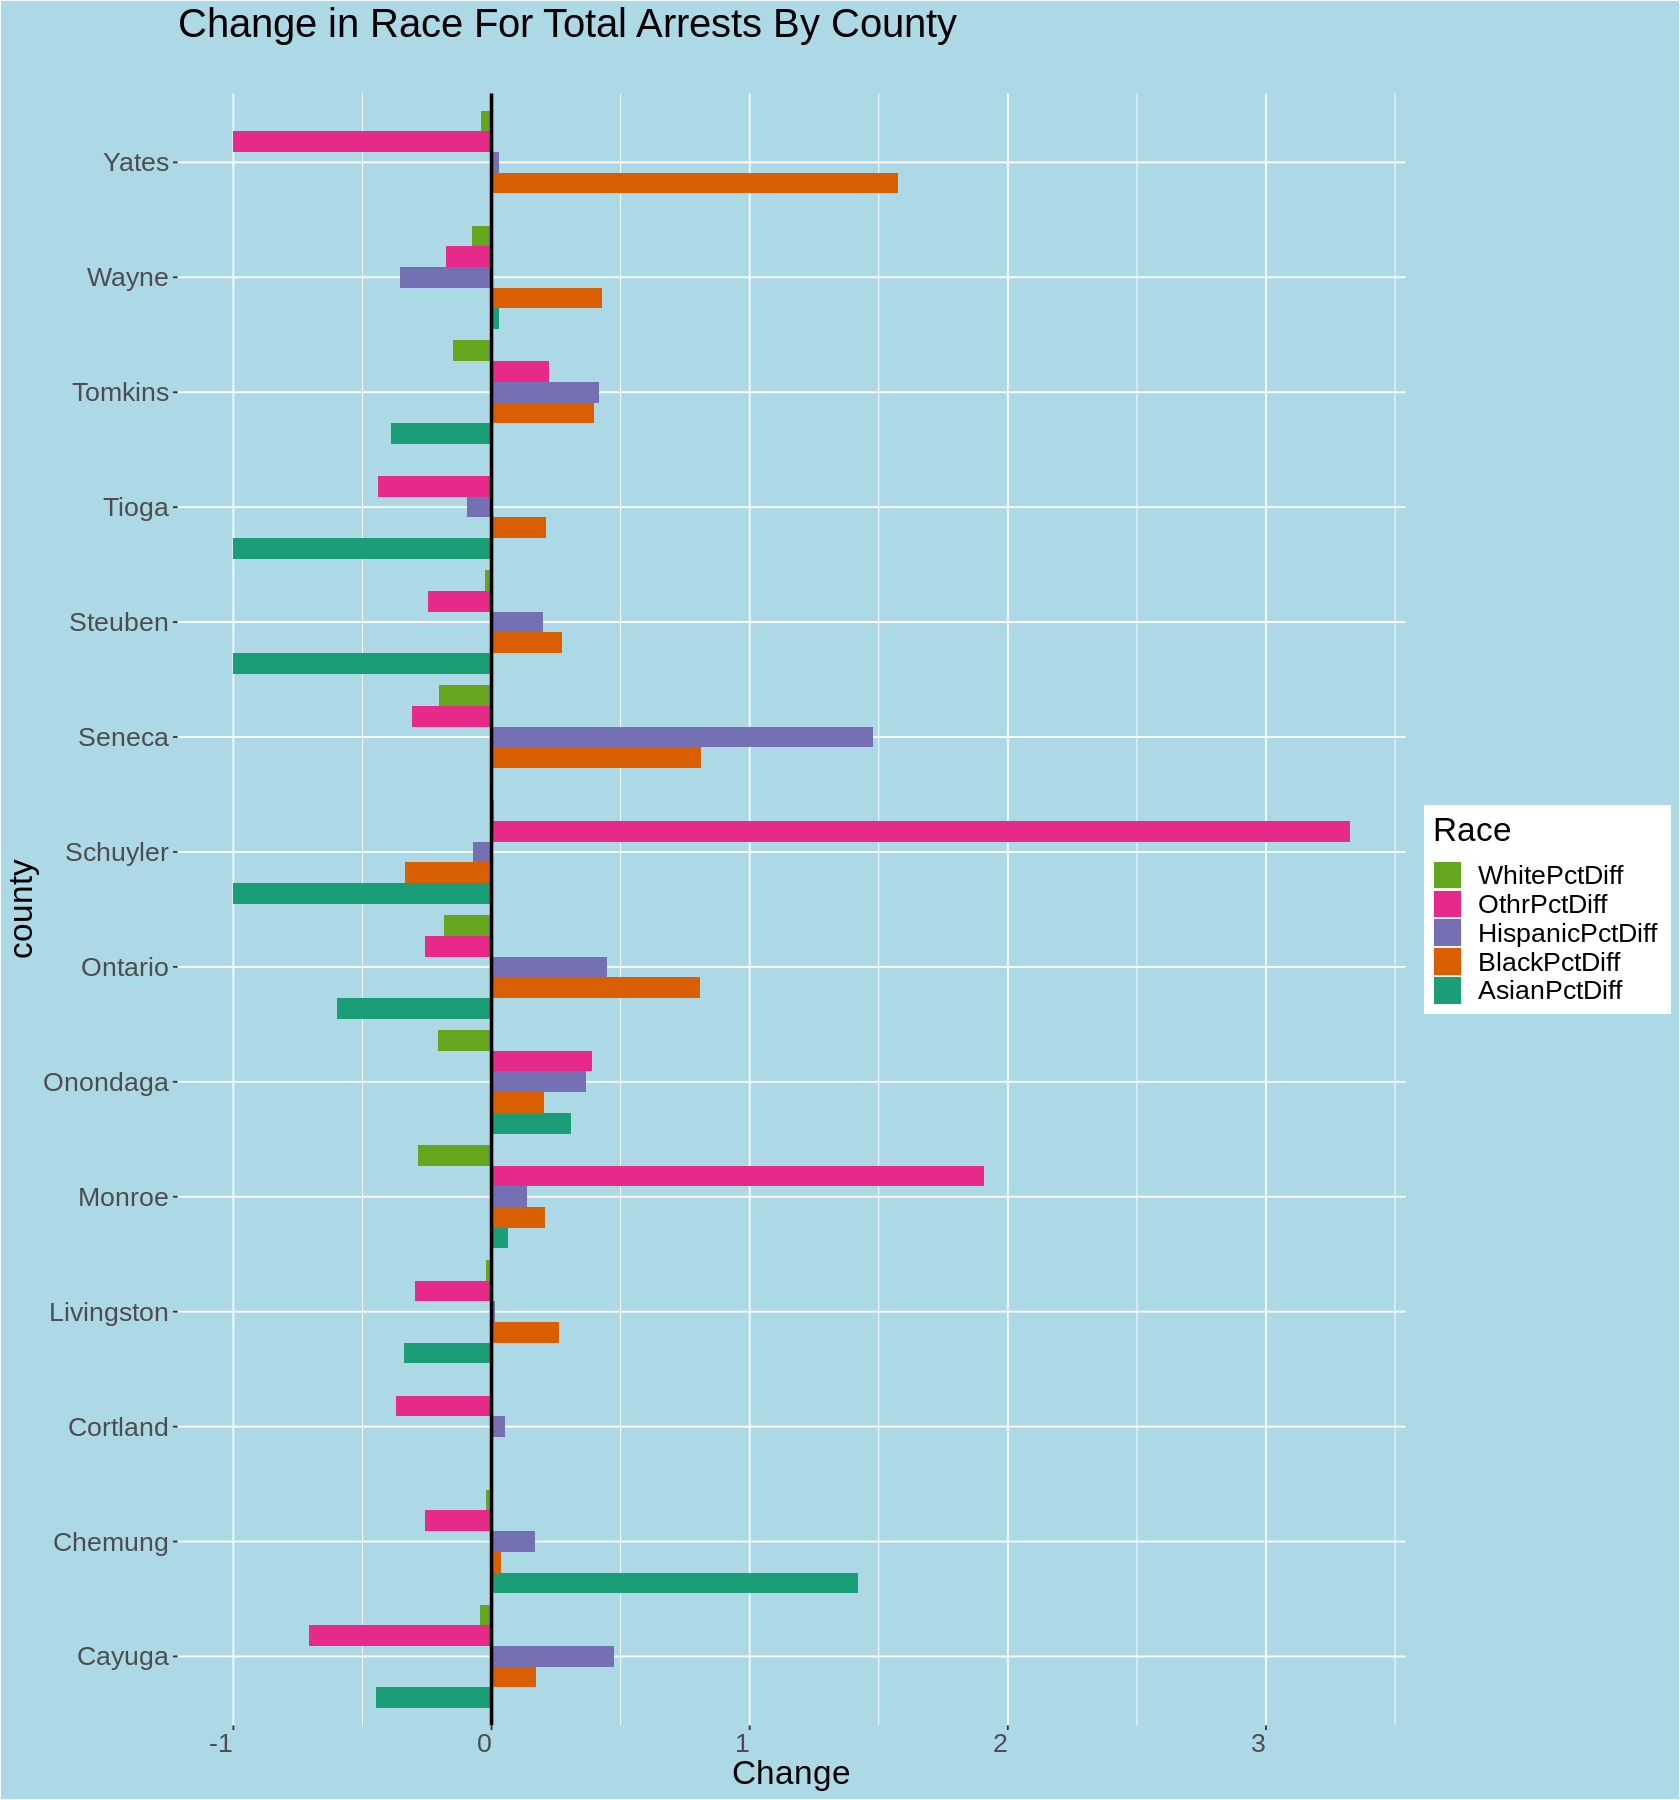

In [209]:
ggplot(Race_values_Pct_Change_longer, aes(county, Change   , fill = Race)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Change in Race For Total Arrests By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= TRUE))+
                      coord_flip()+
                      geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)

## Crime Compostion Per County.

facet_wrap(~Crime)+

In [162]:
head(CGR_gender_compiled,3) 

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0
2,2016,Cayuga,Felony Total,431,326,105,0
3,2016,Cayuga,Drug,51,36,15,0


In [163]:
# First filter out the non pct data
target<- c("Felony Total","Drug","Violent	","DWI","Property" , "Other" , "Misdemeanor Total" , "Drug_2")

In [164]:
Crime_Compostion <- filter(CGR_gender_compiled, Crime %in% target)

In [165]:
head(Crime_Compostion,3)
tail(CGR_gender_compiled,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Felony Total,431,326,105,0
2,2016,Cayuga,Drug,51,36,15,0
3,2016,Cayuga,DWI,38,25,13,0


,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
306,2019,Yates,DWI,58,42,16,0
307,2019,Yates,Property,26,19,7,0
308,2019,Yates,Other,92,70,22,0


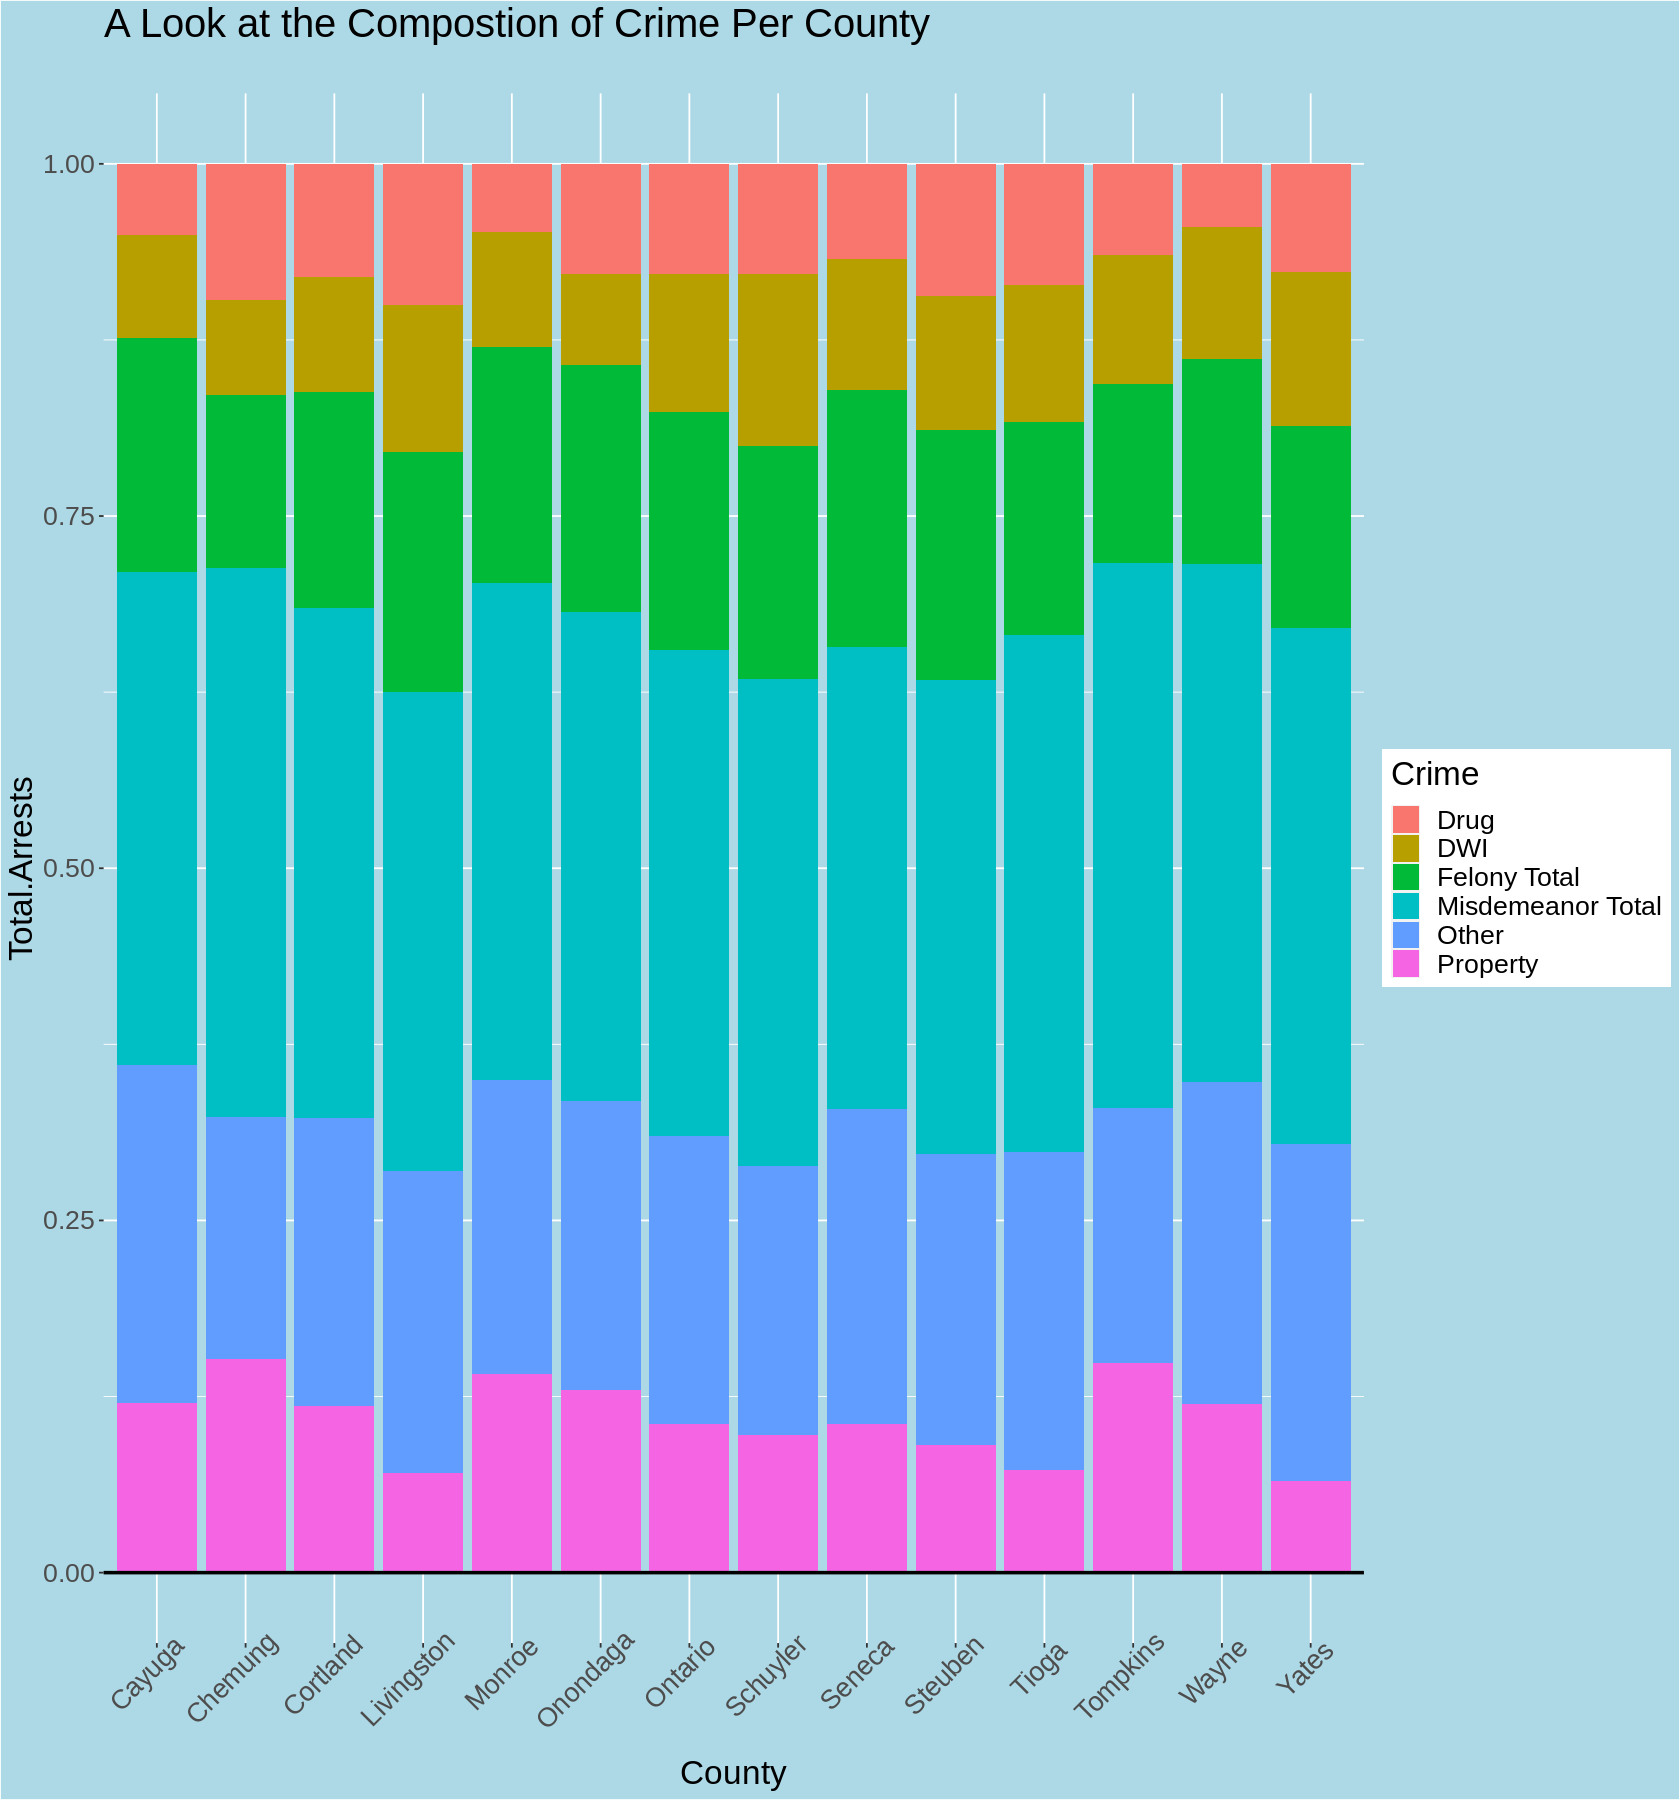

In [166]:
ggplot(Crime_Compostion, aes(x = County, y = Total.Arrests , fill = Crime)) +
                              geom_bar(position = "fill"  ,stat = "identity")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "A Look at the Compostion of Crime Per County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= FALSE))+
                 geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)

Stacked for crime by year

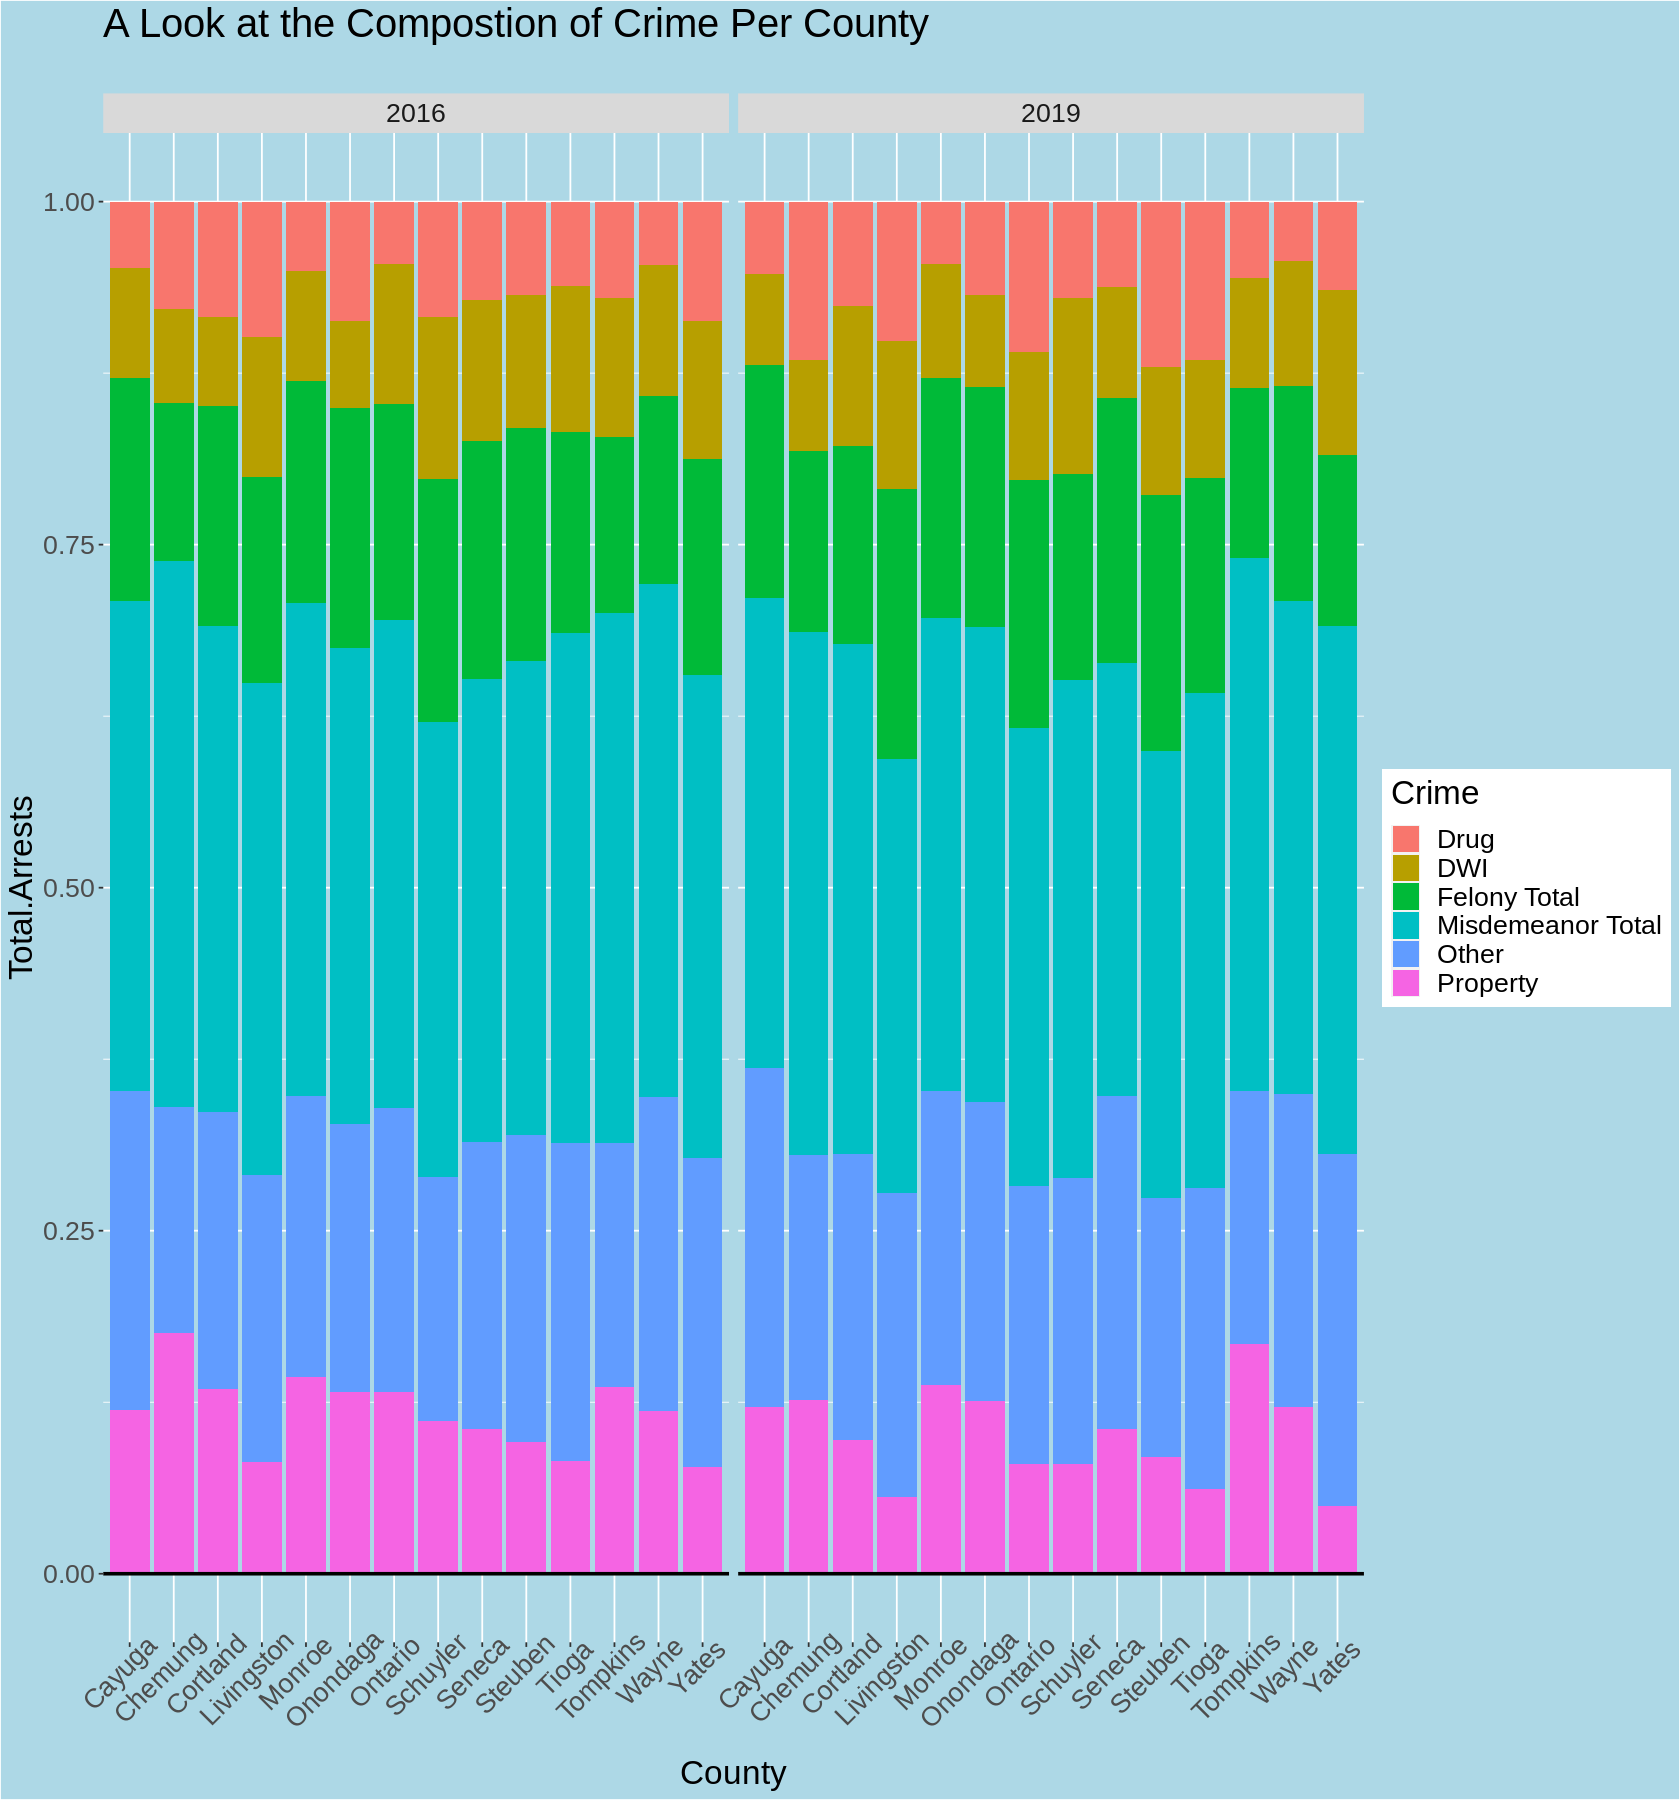

In [174]:
ggplot(Crime_Compostion, aes(x = County, y = Total.Arrests , fill = Crime)) +
                              geom_bar(position = "fill"  ,stat = "identity")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "A Look at the Compostion of Crime Per County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= FALSE))+
                 geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)+
                facet_wrap(~Year)


In [ ]:
############


In [175]:
head(Crime_Compostion,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Felony Total,431,326,105,0
2,2016,Cayuga,Drug,51,36,15,0
3,2016,Cayuga,DWI,38,25,13,0


In [184]:
Crime_Compostion$Year <- as.factor(Crime_Compostion$Year)

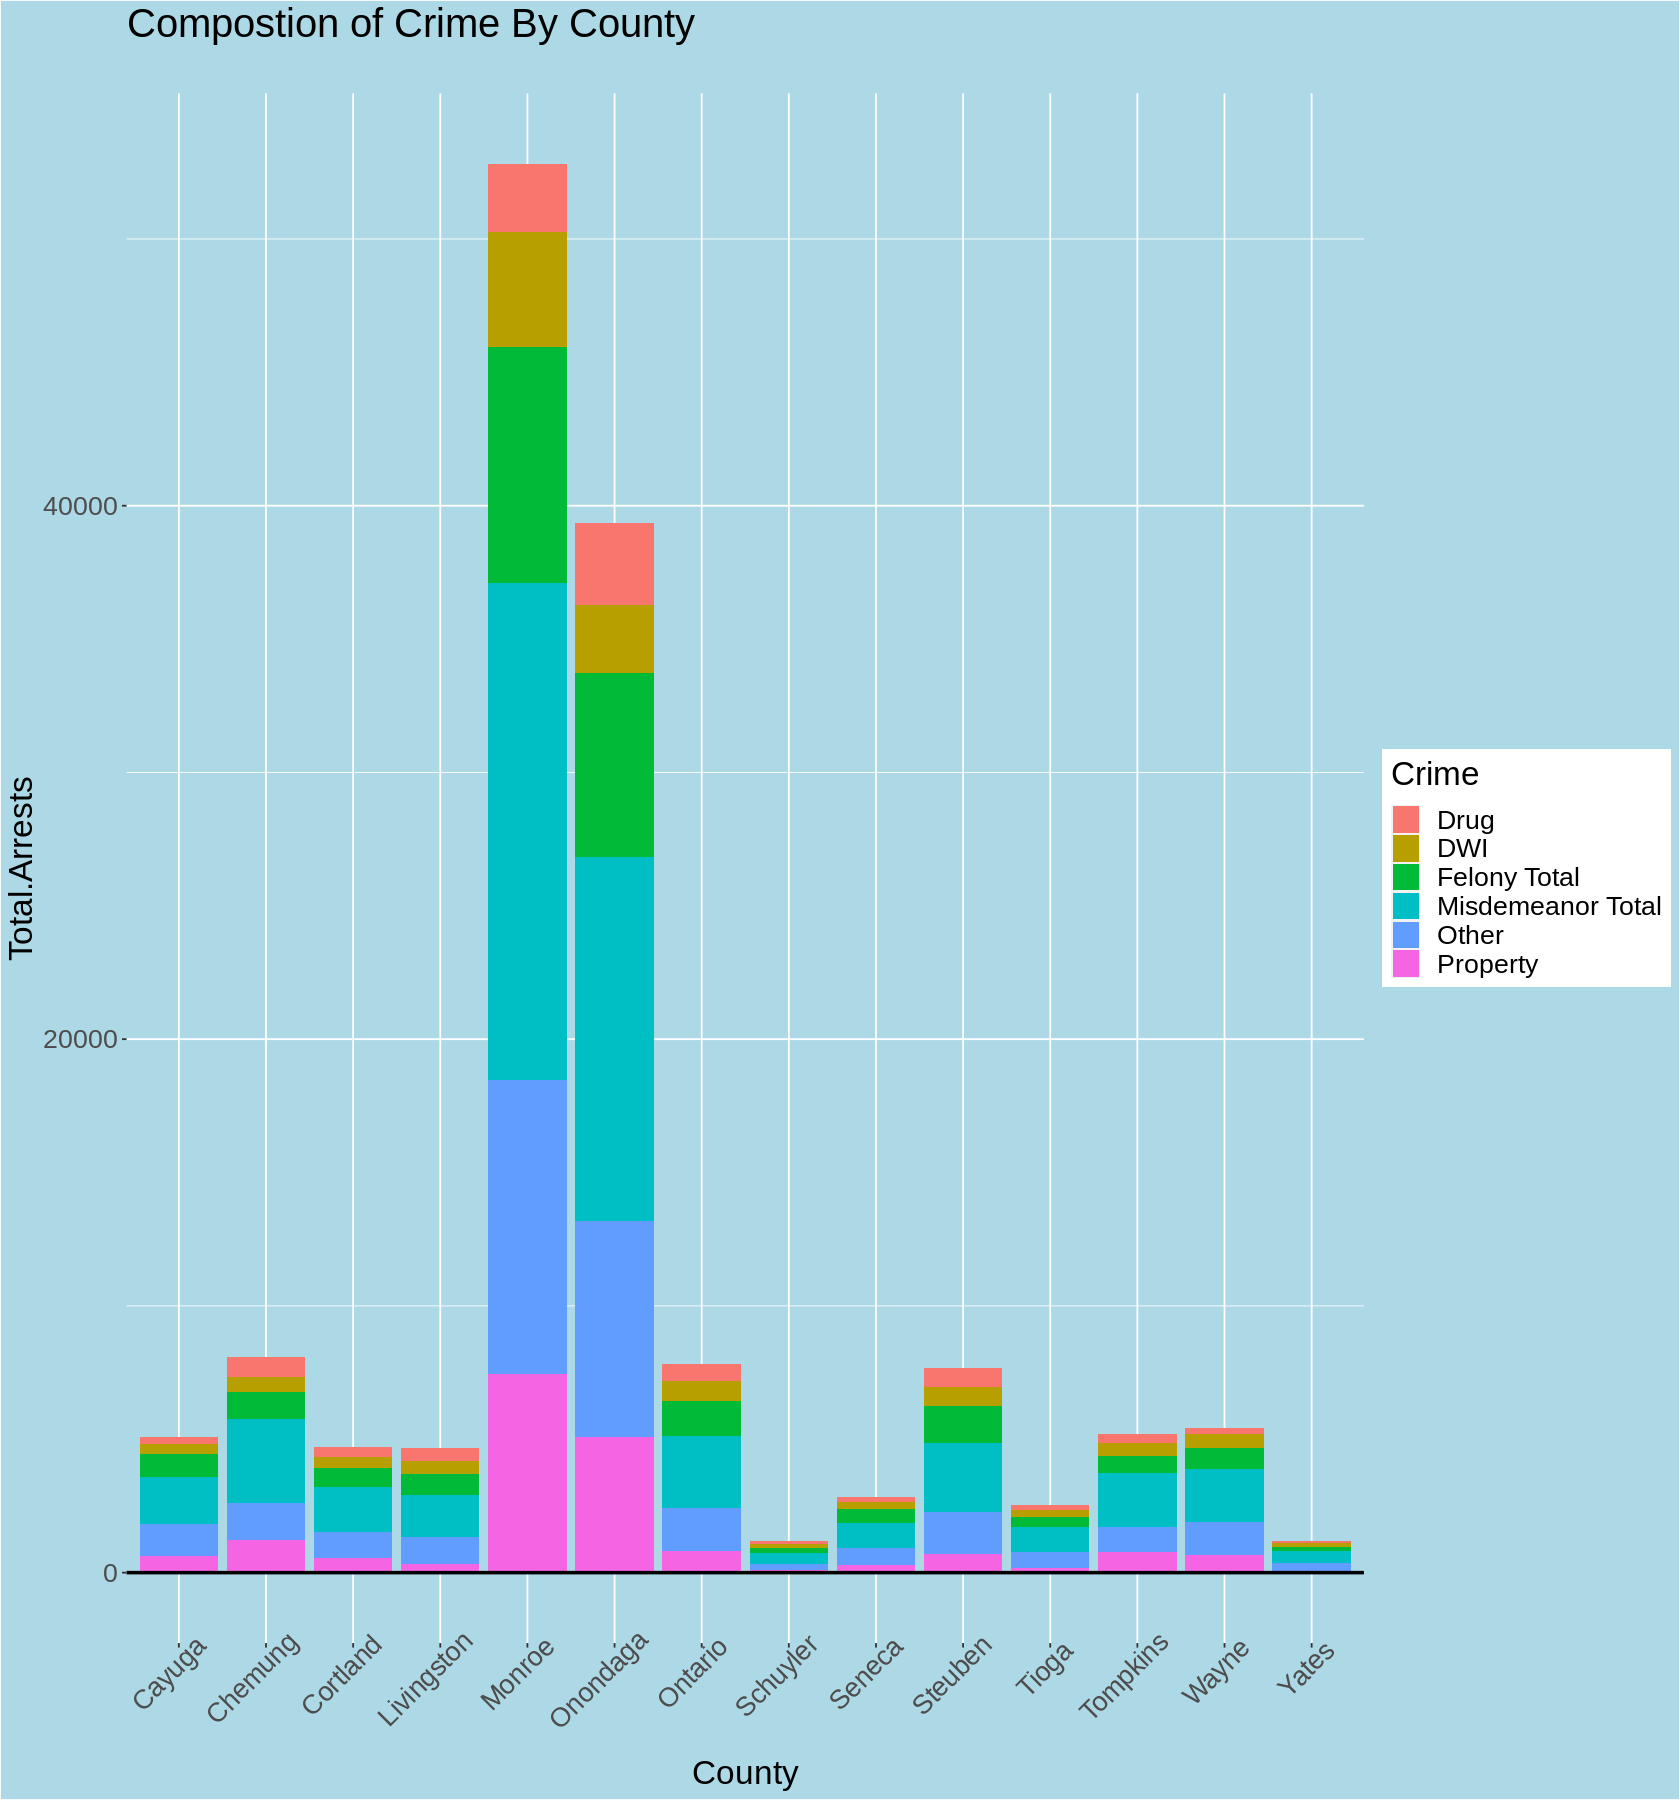

In [211]:
 ggplot(Crime_Compostion, aes(County, Total.Arrests )) +
                              geom_bar(aes(fill= Crime)  ,stat = "identity")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Compostion of Crime By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= FALSE))+
                 geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)


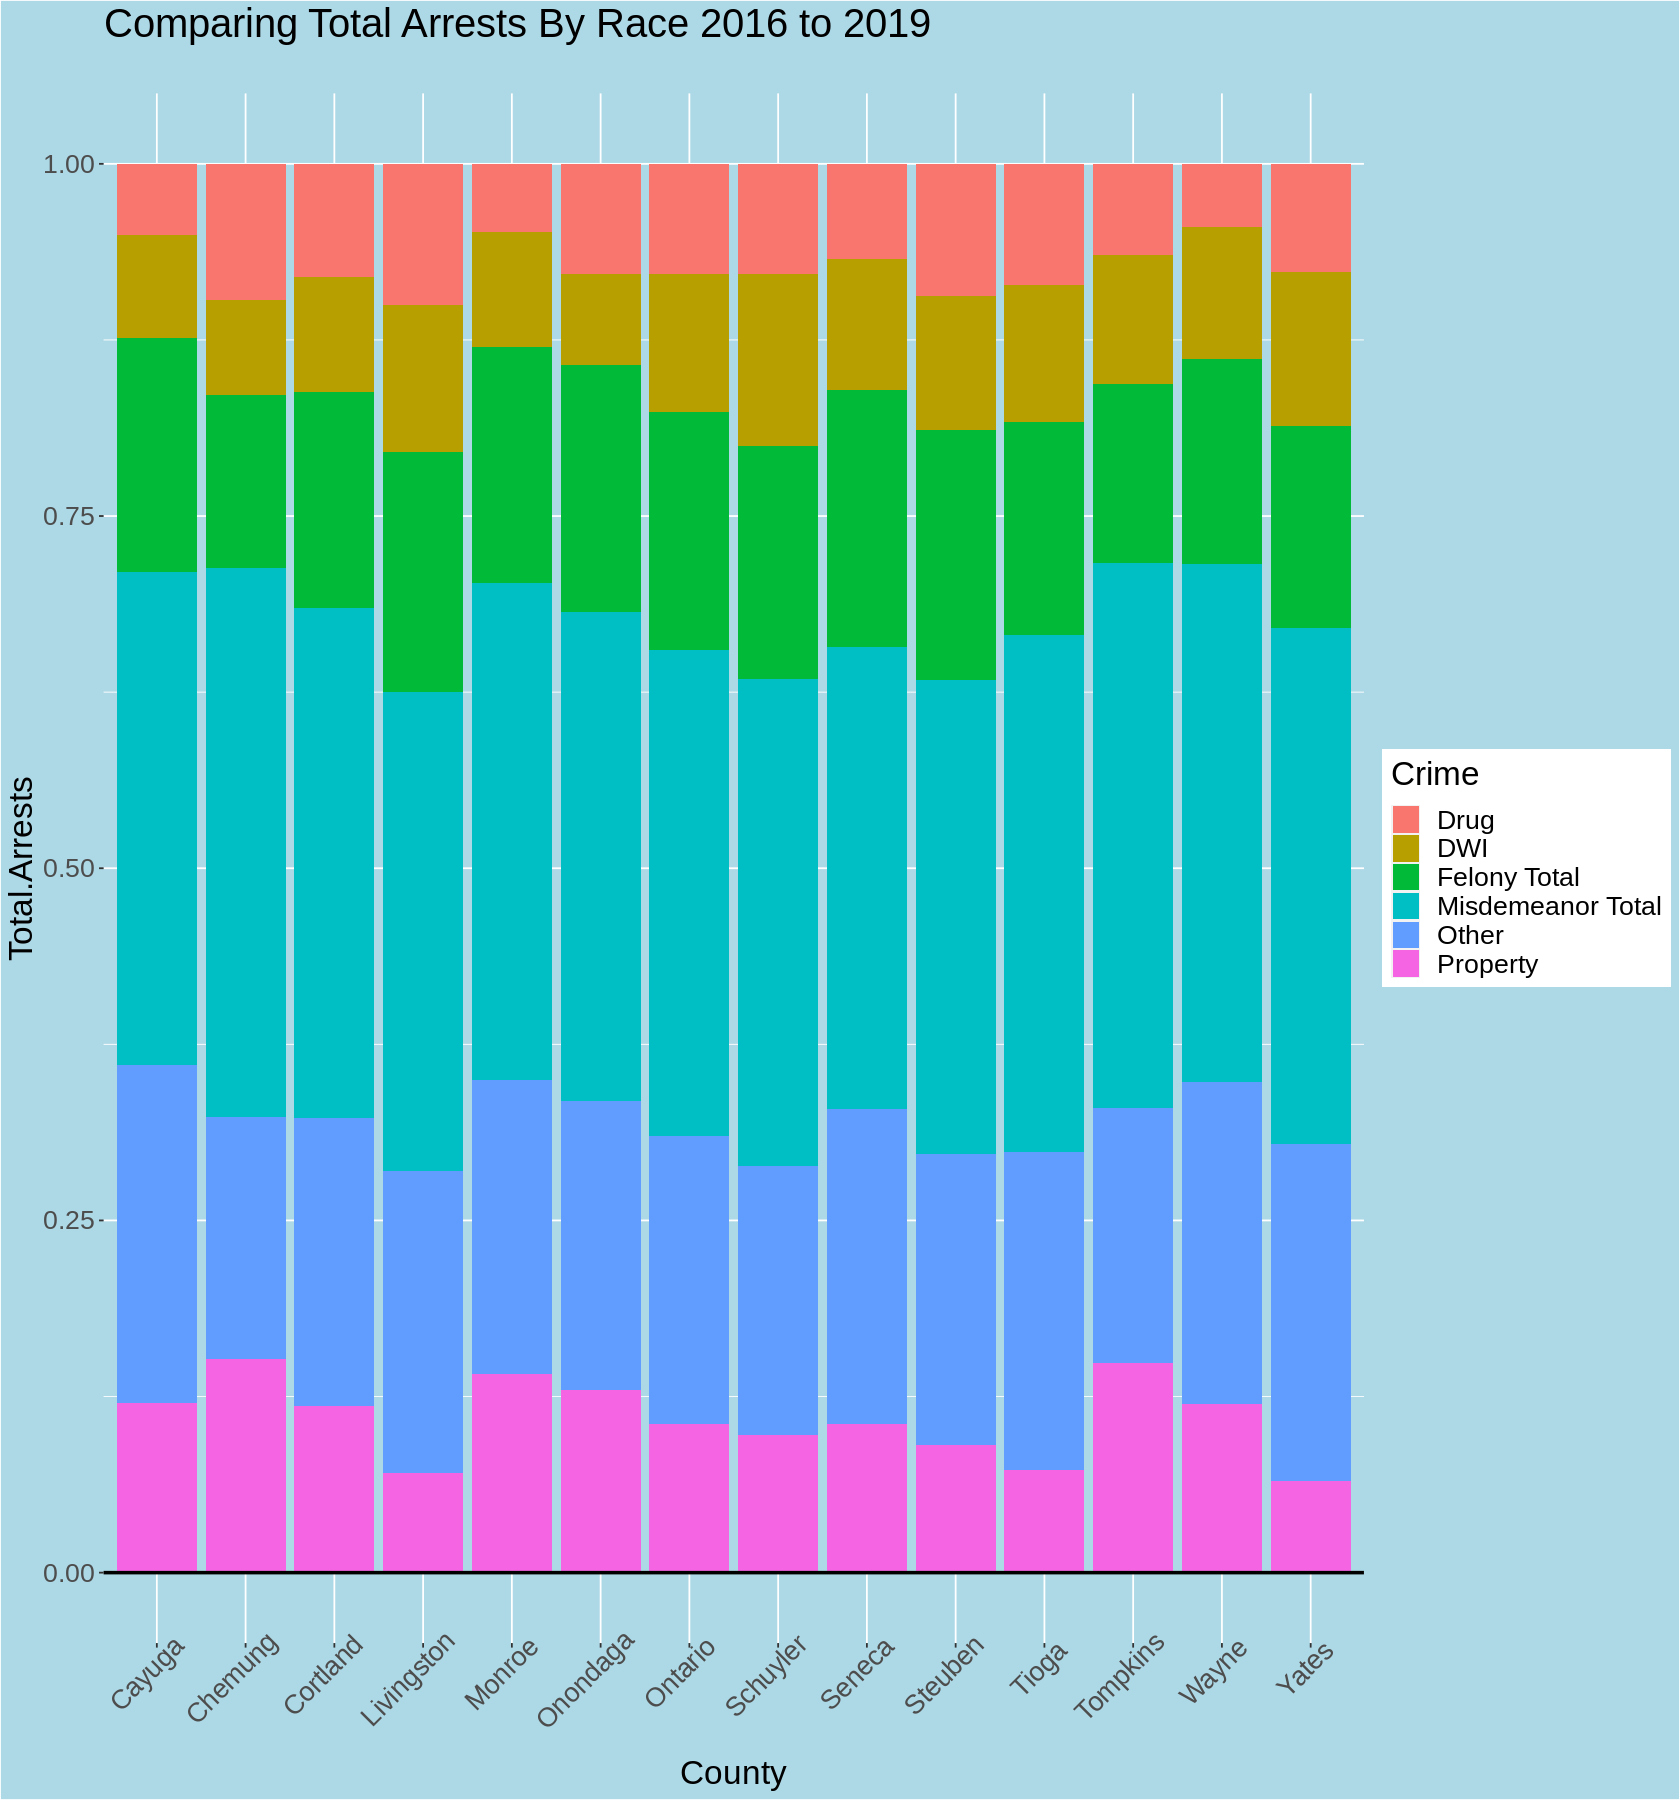

In [181]:
 ggplot(Crime_Compostion, aes(County, Total.Arrests,fill = Crime )) +
                              geom_bar(position = "fill",  ,stat = "identity")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Total Arrests By Race 2016 to 2019",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= FALSE))+
                 geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)+
                

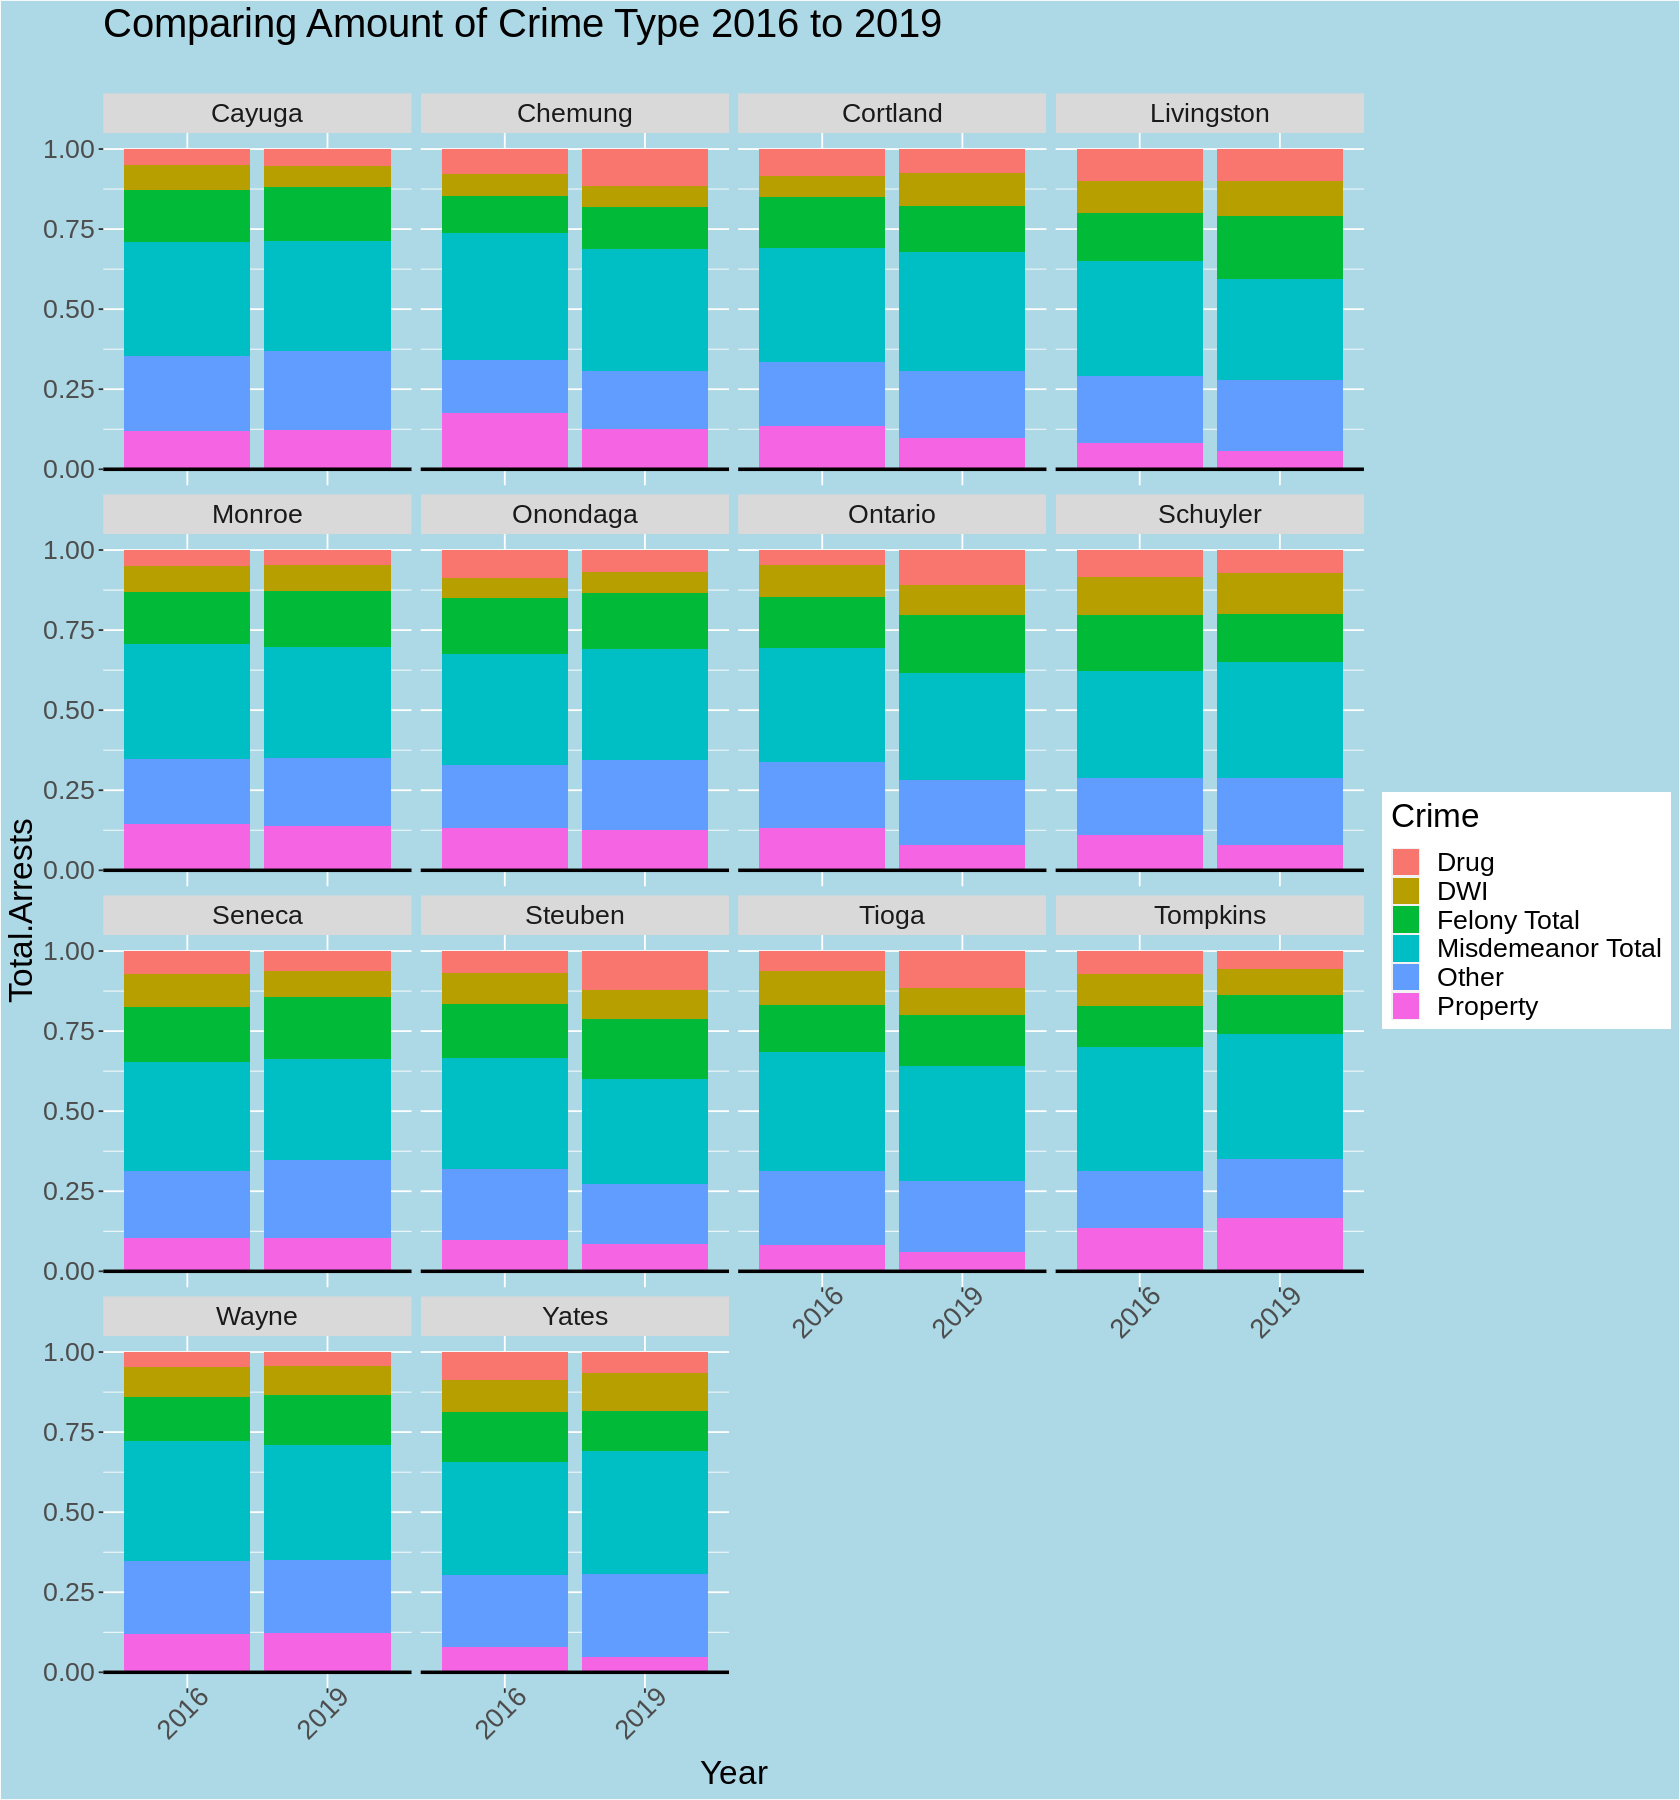

In [214]:
 ggplot(Crime_Compostion, aes(Year, Total.Arrests,fill = Crime )) +
                              geom_bar(position = "fill",  ,stat = "identity")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Amount of Crime Type 2016 to 2019",
                subtitle = "")+
                 guides(fill = guide_legend(reverse= FALSE))+
                 geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)+
                facet_wrap(~County)

In [ ]:
######

In [192]:
head(CGR_race,3)
tail(CGR_race ,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,0,0.000000000,1,0.019607843


,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
305,Yates,2019,DWI,58,52,0.8965517,2,0.03448276,3,0.05172414,0,0,1,0.01724138
306,Yates,2019,Property,26,23,0.8846154,3,0.11538462,0,0.00000000,0,0,0,0.00000000
307,Yates,2019,Other,92,86,0.9347826,3,0.03260870,3,0.03260870,0,0,0,0.00000000


In [200]:
table(CGR_race$county , CGR_race$crime ,useNA = "always")

            
             Drug Drug_2 DWI Felony Total Misdemeanor Total Other Property
  Cayuga        2      2   4            2                 2     4        2
  Chemung       2      2   4            2                 2     4        2
  Cortland      2      2   4            2                 2     4        2
  Livingston    2      2   4            2                 2     3        2
  Monroe        2      2   4            2                 2     4        2
  Onondaga      2      2   4            2                 2     4        2
  Ontario       2      2   4            2                 2     4        2
  Schuyler      2      2   4            2                 2     4        2
  Seneca        2      2   4            2                 2     4        2
  Steuben       2      2   4            2                 2     4        2
  Tioga         2      2   4            2                 2     4        2
  Tomkins       2      2   4            2                 2     4        2
  Wayne     

In [204]:
crosstab(CGR_race , row.variables = c("County" , "year", col.vars = "Total.Arrests", type= "j"))

ERROR: ignored

In [201]:
head(CGR_race)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.030567686,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.027842227,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.019607843,0,0.000000000,1,0.019607843
4,Cayuga,2016,Violent,104,79,0.7596154,24,0.2307692,1,0.009615385,0,0.000000000,0,0.000000000
5,Cayuga,2016,DWI,38,33,0.8684211,4,0.1052632,0,0.000000000,0,0.000000000,1,0.026315789
6,Cayuga,2016,Other,238,180,0.7563025,48,0.2016807,10,0.042016807,0,0.000000000,0,0.000000000


In [206]:
CGR_race_corr <- CGR_race %>%
        select( county, crime, Total.Arrests )

In [208]:
cor(CGR_race_corr)

ERROR: ignored